+ https://colab.research.google.com/github/mnassrib/customer-churn-prediction-with-python/blob/master/customer_churn_prediction_telecom_churn_dataset.ipynb#scrollTo=jCcj_fjHhfTh

+ https://www.kaggle.com/code/jazidesigns/marketing-analytics-predicting-customer-churn

+ https://goldinlocks.github.io/Market-Basket-Analysis-in-Python/


##**Marketing Analytics : Prédire le taux de désabonnement des clients en Python**

+ *4 heures*
+ *13 vidéos*
+ *45 exercices*
+ *13 624 participants*
+ *3 550 XP*

###**Description du cours**

+ *Le désabonnement se produit lorsqu'un client cesse de faire des affaires ou met fin à une relation avec une entreprise. Il s'agit d'un problème courant dans une variété d'industries, des télécommunications à la télévision par câble en passant par le SaaS, et une entreprise qui peut prévoir le taux de désabonnement peut prendre des mesures proactives pour fidéliser des clients précieux et devancer la concurrence. Ce cours vous fournira une feuille de route pour créer vos propres modèles de désabonnement client. Vous apprendrez à explorer et à visualiser vos données, à les préparer pour la modélisation, à faire des prédictions à l'aide de l'apprentissage automatique et à communiquer des informations importantes et exploitables aux parties prenantes. À la fin du cours, vous serez à l'aise avec la bibliothèque pandas pour l'analyse de données et la bibliothèque scikit-learn pour l'apprentissage automatique.*

####**1) Analyse exploratoire des données**

+ ***Commencez à explorer l'ensemble de données Telco Churn en utilisant des pandas pour calculer des statistiques récapitulatives et Seaborn pour créer des visualisations attrayantes.***


|OBJECTIFS|
|---------|
Bienvenue au cours
Définir le taux de désabonnement des clients
Explorer le taux de désabonnement des clients
Regroupement et synthèse des données
Statistiques récapitulatives pour les deux classes
Taux de désabonnement par État
Explorer vos données à l'aide de visualisations
Explorer les distributions de fonctionnalités
Appels au service client et désabonnement

####**2) Prétraitement pour la modélisation du taux de désabonnement**

+ ***Après avoir exploré vos données, il est maintenant temps de les prétraiter et de les préparer pour l'apprentissage automatique. Découvrez le pourquoi, le quoi et le comment du prétraitement, y compris la sélection des fonctionnalités et l'ingénierie des fonctionnalités.***


|OBJECTIFS|
|---------|
Prétraitement des données
Identifier les fonctionnalités à convertir
Encodage des fonctionnalités binaires
Un encodage à chaud
Mise à l'échelle des fonctionnalités
Sélection et ingénierie des fonctionnalités
Supprimer les fonctionnalités inutiles
Ingénierie d'une nouvelle colonne

####**3) Prédiction de désabonnement**

+ ***Avec vos données prétraitées et prêtes pour l'apprentissage automatique, il est temps de prévoir le taux de désabonnement ! Découvrez comment créer des modèles de machine d'apprentissage supervisé en Python à l'aide de scikit-learn.***

|OBJECTIFS|
|---------|
Faire des prédictions
Prédire si un nouveau client va se désabonner
Entraînement d'un autre modèle scikit-learn
Évaluation des performances du modèle
Création d'ensembles d'entraînement et de test
Vérifiez la longueur de chaque ensemble
Précision de calcul
Métriques du modèle
Matrice de confusion
Taille variable de l'ensemble d'entraînement
Précision de calcul et rappel
Autres métriques du modèle
Courbe ROC
Aire sous la courbe
Courbe précision-rappel
Classement F1

####**4) Réglage du modèle**

+ ***Découvrez comment améliorer les performances de vos modèles à l'aide du réglage des hyperparamètres et mieux comprendre les facteurs de désabonnement des clients que vous pouvez répercuter sur l'entreprise.***

|OBJECTIFS|
|---------|
Réglage de votre modèle
Réglage du nombre de fonctionnalités
Réglage d'autres hyperparamètres
Recherche aléatoire
Importance des fonctionnalités
Visualisation de l'importance des fonctionnalités
Amélioration de l'intrigue
Interpréter l'importance des fonctionnalités
Ajout de nouvelles fonctionnalités
Les performances du modèle s'améliorent-elles ?
Calcul d'autres métriques

In [36]:
import pandas as pd
import numpy as np


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###**Bienvenue au cours**

####**1. Bienvenue au cours**

+ ***Bonjour et bienvenue à ce cours d’introduction sur Churn Modeling en Python! Je suis Mark Peterson, scientifique des données senior, créateur et mainteneur de ce cours.*** 

#####**2. Analyse de l’attrition**

+ J’ai travaillé en étroite collaboration dans l’analyse de l’attrition dans une variété d’industries et de pays allant de la modélisation de l’attrition des cartes de crédit en Amérique latine, les annulations de télévision par câble aux États-Unis et les annulations Saas dans mon rôle actuel.

####**3. Désabonnement des clients**

+ ***Qu’est-ce que l’attrition des clients exactement ? C’est lorsqu’un client existant, un utilisateur, un joueur, un abonné ou tout type de client de retour cesse de faire des affaires ou met fin à la relation avec une entreprise.*** Il peut être défini de diverses façons.

####**4. Désabonnement des clients**

####**5. Désabonnement contractuel**


+ ***Désabonnement contractuel, ou lorsqu’un client est sous contrat pour un service et décide d’annuler son service. Cela peut être trouvé dans la télévision par câble et les produits SaaS.***

#####**6. Désabonnement volontaire***


+ ***L’attrition volontaire se produit lorsqu’un utilisateur annule volontairement un service et inclut les téléphones cellulaires prépayés, les abonnements en streaming.***

####**7. Désabonnement non contractuel**


+ ***Le service non contractuel ou lorsqu’un client n’est pas sous contrat pour un service est le prochain exemple de désabonnement et comprend la fidélisation des consommateurs dans un point de vente au détail ou la navigation en ligne.***

####**8. Désabonnement involontaire : expiration de la carte de crédit**

+ Enfin, le désabonnement involontaire, ou lorsqu’un attrition ne se produit pas à la demande du client et comprend l’expiration de la carte de crédit,

####**9. Désabonnement involontaire : les services publics sont désactivés**
+ ou les utilités étant fermées par le fournisseur.

####**10. Utiliser votre expérience**

+ Très probablement, en tant que client, vous avez annulé un service pour diverses raisons, notamment un manque d’utilisation, un service médiocre ou un meilleur prix. 

+ Être en mesure de tirer parti de cette expérience ainsi que de votre connaissance du domaine vous aidera à vous guider dans votre parcours de modélisation de l’attrition.

####**11. Ensemble de données sur l’attrition des télécommunications**

+ Dans ce cours, vous apprendrez à créer un modèle de désabonnement du début à la fin. 

+ Les données que vous utiliserez proviennent d’un ensemble de données d’utilisation cellulaire composé d’enregistrements de clients réels de téléphones cellulaires et de fonctionnalités

####**12. Caractéristiques d’intérêt**

+ qui comprennent des caractéristiques spécifiques au service cellulaire d’un client, comme la messagerie vocale et les appels internationaux, le coût du service, l’utilisation d’un client et une caractéristique permettant au client d’annuler son service ou non.

####**13. Comment le taux de désabonnement est-il défini ici**

+ ***Ici, l’attrition est définie par le client annulant son forfait cellulaire à un moment donné et est codée dans l’ensemble de données comme non et oui.***

####**14. Analyse exploratoire des données à l’aide de pandas**

+ Dans les exercices interactifs suivants, vous commencerez à interagir avec les données pour acquérir une compréhension de base de leurs fonctionnalités et types de données.
+  Vous calculerez également des statistiques récapitulatives pour avoir une idée de la façon dont les données sont distribuées.

#####**15. Analyse exploratoire des données à l’aide de pandas**

+ Pour ce faire, vous utiliserez des méthodes pandas que vous connaissez peut-être déjà dans d’autres cours DataCamp, telles que ***.head(), .describe() et .mean()***. 

+ Cette analyse exploratoire vous permettra de vous assurer que les données sont propres et vous donnera une bonne compréhension de la différence entre les désabonnements et les non-désabonnements, ce qui s’avérera précieux une fois que vous aurez commencé à construire votre modèle de désabonnement.

####**16. Explorons les données!**
+ Profitez de l’exploration des données dans les exercices!

###**EXERCICE**

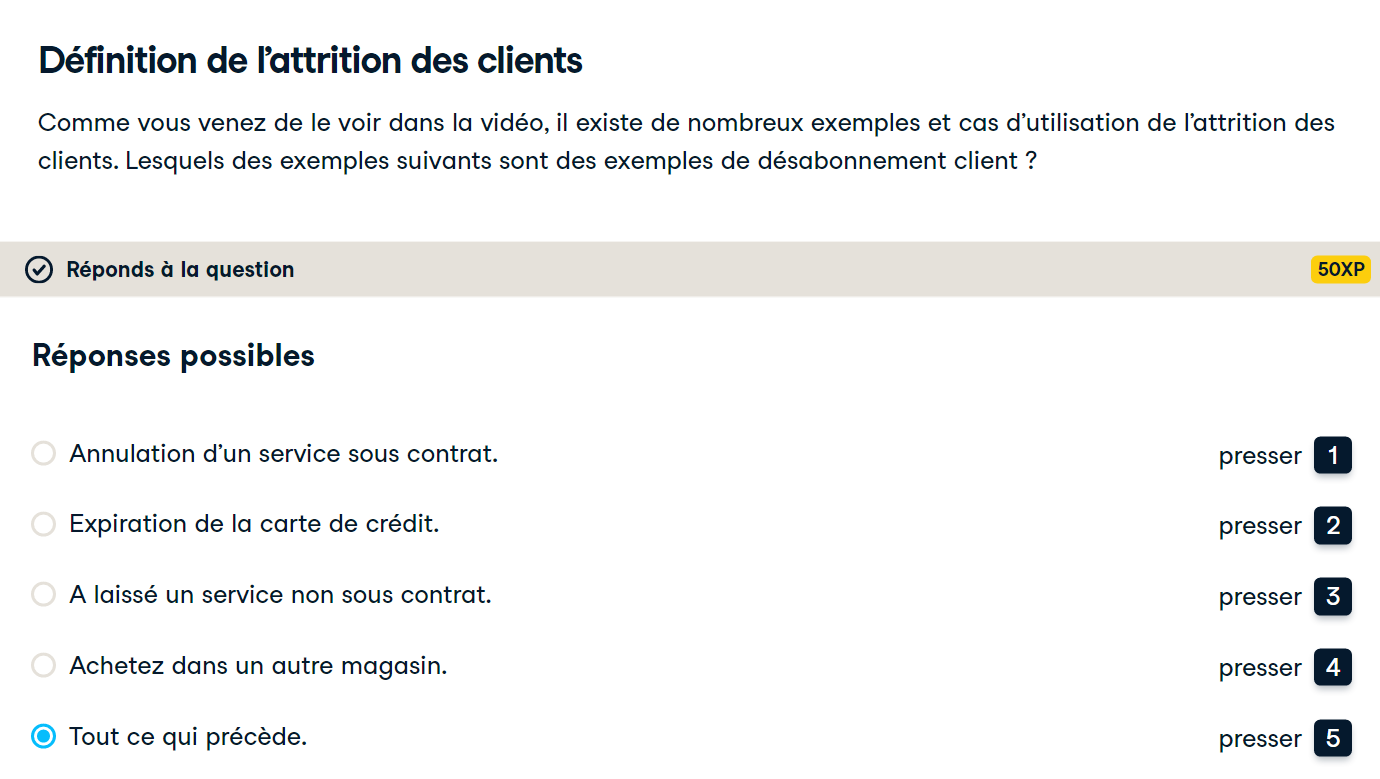

***C’est bien ça! Tout ce qui précède sont des exemples de désabonnement.***


####**Explorer le taux de désabonnement des clients**

+ ***Maintenant que vous savez ce qu'est le taux de désabonnement des clients, examinons la structure de notre ensemble de données client, qui a été préchargé dans un DataFrame appelé telco. Pouvoir vérifier la structure des données est une étape fondamentale dans le processus de modélisation de l'attrition et est souvent négligée.***

+ **Utilisez des méthodes pandas telles que .info() pour avoir une idée de sa structure et notez les différentes colonnes (également appelées "fonctionnalités" dans l'apprentissage automatique), telles que "CustServ_Calls", qui indique le nombre d'appels au service client effectués par le client. , et 'State', qui indique l'état d'où vient le client.**

+ *Une caractéristique nous intéresse particulièrement : le 'Churn', qui peut prendre deux valeurs - oui et non - indiquant si le client a résilié ou non. Dans cet exercice, votre travail consiste à explorer cette fonctionnalité. Vous pouvez y accéder en utilisant telco['Churn'].*

+ *Combien de churners l'ensemble de données a-t-il et combien de non-churners ? Pour répondre facilement à cette question, vous pouvez utiliser la méthode .value_counts() sur telco['Churn'].*

####**Instructions**



+ 2850 barattes et 483 non barattes.

+ 21 barattes et 3312 non barattes.

+ ***483 barattes et 2850 non barattes.***

+ 727 barattes et 2606 non barattes.

In [37]:
telco = pd.read_csv("/content/Churn.csv")

display(telco.head())
print(telco.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


(3333, 21)


In [38]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

***En effet! Il semble qu'il y ait beaucoup plus de non-churners que de churners dans notre ensemble de données.***

###**Regroupement et synthèse des données**

####**1. Regroupement et synthèse des données**

+ ***Dans l’ensemble de données des télécommunications, il y a deux groupes de clients qui nous intéressent : les churners et les non-churners.***

####**2. Désabonnements et non-désabonnements**
+ ***, et comme vous l’avez découvert en utilisant la méthode '.value_counts()', la plupart de ces clients n’ont pas chuté.**

####**3. Résultats du modèle**

+ ***Notre objectif dans ce cours est de construire un modèle qui utilise les informations sur chaque client dans l’ensemble de données pour classer si oui ou non un nouveau client va se désabonner. Ce modèle a donc deux résultats, ou classes : soit un client va se désabonner, soit pas churn.***

#####**4. Différences entre les désabonnements et les non-désabonnements**

+ Avant même d’en arriver à l’étape de création du modèle, vous pouvez utiliser l’analyse exploratoire des données pour identifier les différences entre ces deux classes qui peuvent vous aider à mieux comprendre les facteurs de désabonnement des clients. 

+ Les churners appellent-ils le service client plus souvent? Un État a-t-il plus de churners qu’un autre? Voici quelques questions que vous pouvez poser sur les données.

####**5. Regroupement et synthèse des données**
+ Afin de répondre à ces questions, vous devez être capable de regrouper et de synthétiser vos données. Pour regrouper des données, pandas a une méthode utile appelée .groupby().

####**6. Regroupons et résumons!**
+ Voyons-le en action!

###**EXERCICES**

####**Statistiques récapitulatives pour les deux classes**

+ Considérez le code .groupby() suivant :

        # Grouper par x et calculer l'écart type
        df.groupby(['x']).std()


+ ***Ici, un DataFrame df est regroupé par une colonne 'x', puis l'écart type est calculé sur toutes les colonnes de df pour chaque valeur de 'x'. La méthode .groupby() est incroyablement utile lorsque vous souhaitez étudier des colonnes spécifiques de votre ensemble de données. Ici, vous allez explorer davantage la colonne "Churn" pour voir s'il existe des différences entre les churners et les non-churners. Une version de sous-ensemble de la Telco DataFrame, composée des colonnes 'Churn', 'CustServ_Calls' et 'Vmail_Message' est disponible dans votre espace de travail.***

+ *Si vous avez besoin d'un rappel sur le fonctionnement de .groupby(), veuillez vous référer au cours pré-requis Manipulation de DataFrames avec des pandas.*

####**Instructions**
+ Regroupez telco par "Churn" et calculez la moyenne.
+ Adaptez votre code pour calculer l'écart type au lieu de la moyenne.


####**Question**
+ En fonction des résultats que vous voyez dans le shell IPython, sélectionnez l'instruction correcte parmi les options ci-dessous.

####**Des réponses possibles**

+ Les churners laissent plus de messages vocaux que les non-churners.

+ ***Les churners font plus d'appels au service client que les non-churners.***

+ Les churners laissent moins de messages vocaux que les non-churners.

+ Les churners passent moins d'appels au service client que les non-churners.

####**CONCLUSION**

***Oui! Peut-être sans surprise, les churners semblent faire plus d'appels au service client que les non-churners.***

In [39]:
# Group telco by 'Churn' and compute the mean
display(telco.groupby(['Churn']).mean())

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [40]:
# Adapt your code to compute the standard deviation
display(telco.groupby(['Churn']).std())

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


####**Taux de désabonnement par État**

+ ***Lors du traitement des données client, les régions géographiques peuvent jouer un rôle important pour déterminer si un client annulera ou non son service. Vous avez peut-être remarqué qu'il y a une colonne "State" dans l'ensemble de données. Dans cet exercice, vous allez regrouper "State" et "Churn" pour compter le nombre de désabonnements et de non désabonnements par état. Par exemple, si vous souhaitez regrouper par x et agréger par y, vous pouvez utiliser .groupby() comme suit*** :

      df.groupby('x')['y'].value_counts()

#####**Instructions**

+ Regroupez les opérateurs de télécommunications par «État», agrégez par «Churn», puis utilisez value_counts () pour compter le nombre de churners et de non-churners par état.

####**Question**

+ ***Jetez un œil à la sortie dans le shell IPython et sélectionnez l'instruction correcte parmi les options ci-dessous.***

####**Des réponses possibles**

+ ***La Californie (CA) compte 25 non-churners et 9 churners.***

+ Le Colorado (CO) compte 9 non-churners et 57 churners.

+ L'Alabama (AL) compte 49 non-churners et 3 churners.

####**CONCLUSION**

***En effet! Bien que la Californie soit l'État le plus peuplé des États-Unis, il n'y a pas autant de clients californiens dans notre ensemble de données. L'Arizona (AZ), par exemple, compte 64 clients, dont 4 ont fini par abandonner. En comparaison, la Californie a un nombre (et un pourcentage) plus élevé de clients qui ont abandonné. C'est une information utile pour une entreprise !***

In [41]:
# Count the number of churners and non-churners by State
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

###**Explorer vos données à l’aide de visualisations**
####**1. Explorer vos données à l’aide de visualisations**

+ ***L’une des parties les plus importantes du flux de travail EDA est la visualisation des données. Il vous aide à mieux comprendre vos données et vous permet de communiquer efficacement des informations aux parties prenantes techniques et non techniques.***

####**2. Visualisation des données en Python**

+ ***En Python, la bibliothèque seaborn vous permet de créer facilement des tracés informatifs et attrayants. Il s’appuie sur matplotlib, que vous avez peut-être vu dans d’autres cours. Ici, nous utiliserons seaborn.***

####**3. Visualisation de la répartition de la longueur des comptes**

+ Disons que vous vouliez visualiser la répartition des longueurs de compte de vos clients. 

+ De nombreux algorithmes d’apprentissage automatique font des hypothèses sur la façon dont les données sont distribuées, il est donc important de comprendre comment les variables de votre propre jeu de données sont distribuées avant d’appliquer ces algorithmes. 

+ ***Un histogramme est un moyen efficace de visualiser la distribution d’une variable, et vous pouvez en créer une à l’aide de la fonction distplot de seaborn, abréviation de distributed plot***. 

+ Tout d’abord, l’importation par voie maritime. 

+ Ensuite, passez la fonction Longueur du compte du DataFrame de télécommunications à la fonction distplot. N’oubliez pas d’appeler plot dot show pour afficher le tracé.

####**4. Visualisation de la répartition de la longueur des comptes**

+ ***Vous pouvez voir ici qu’elle ressemble à une courbe en cloche, également connue sous le nom de distribution normale***. 

+ **Il s’avère que beaucoup de choses que nous mesurons dans le monde réel sont bien approximées par la distribution normale, et de nombreux modèles supposent en fait que vos données sont normalement distribuées.**

####**5. Différences dans la longueur du compte**

+ Visualisons maintenant les différences de longueur de compte entre les désabonnements et les non-désabonnements. 

+ Un moyen efficace de le faire consiste à utiliser un diagramme en boîte, que vous pouvez créer à l’aide de la fonction de diagramme en boîte de seaborn en spécifiant les paramètres $x$, $y$ et de données comme indiqué ici. 

+ Comme vous pouvez le constater, il ne semble pas y avoir de différence notable dans la durée du compte.

####**6. Différences dans la longueur des comptes**

+ La ligne au milieu de chaque case représente la médiane.

####**7. Différences dans la longueur des comptes**

+ Les cases colorées représentent les 50 % intermédiaires de la longueur des comptes pour chaque groupe.

####**8. Différences dans la longueur des comptes**

+ Les valeurs ici vont du 25 au

####**9. Différences dans la longueur des comptes**

+ 75e percentile et donner une idée

####**10. Différences dans la longueur des comptes**

+ pour la diffusion de la distribution.

#####**11. Différences dans la longueur du compte**

+ Les virgules flottantes représentent des valeurs aberrantes,

####**12. Différences dans la longueur du compte**

+ que vous pouvez supprimer à l’aide du paramètre « sym », comme indiqué ici.

####**13. Ajout d’une troisième variable**

+ Seaborn vous permet d’ajouter facilement une troisième variable à votre parcelle. 

+ Par exemple, nous pourrions être intéressés à visualiser si la fonctionnalité « Plan international » a un impact sur la durée ou le taux de désabonnement du compte. 

+ Vous pouvez ajouter ces informations au tracé en spécifiant le paramètre « hue ». 

+ D’après l’intrigue, il semble qu’en ce qui concerne la prédiction du taux de désabonnement, peu importe qu’un client ait ou non un plan international.

####**14. Faisons quelques intrigues!**
+ Dans les exercices, vous visualiserez les distributions d’autres caractéristiques et étudierez leur influence sur le taux de désabonnement. 
+ Bonne intrigue!


###**EXERCICES**

####**Explorer les distributions de fonctionnalités**

+ ***Vous avez vu dans la vidéo que la fonctionnalité "Account_Length" était normalement distribuée. Visualisons maintenant les distributions des entités suivantes à l'aide du diagramme de distribution de Seaborn***:

  + 'Day_Mins'
  + 'Eve_Mins'
  + 'Night_Mins'
  + 'Intl_Mins'

+ **Pour créer le diagramme de distribution d'une entité, transmettez-le comme argument à sns.distplot(). L'ensemble de données Telco est disponible sous la forme d'un DataFrame appelé telco.*

####**Consignes**
+ 1)
  + Visualisez la distribution de 'Day_Mins'.

+ 2)
  + Mettez à jour votre code pour visualiser la distribution de 'Eve_Mins'.

+ 3)
  + Mettez à jour votre code pour visualiser la distribution de 'Night_Mins'.

+ 4)
  + Mettez à jour votre code pour visualiser la distribution de 'Intl_Mins'.

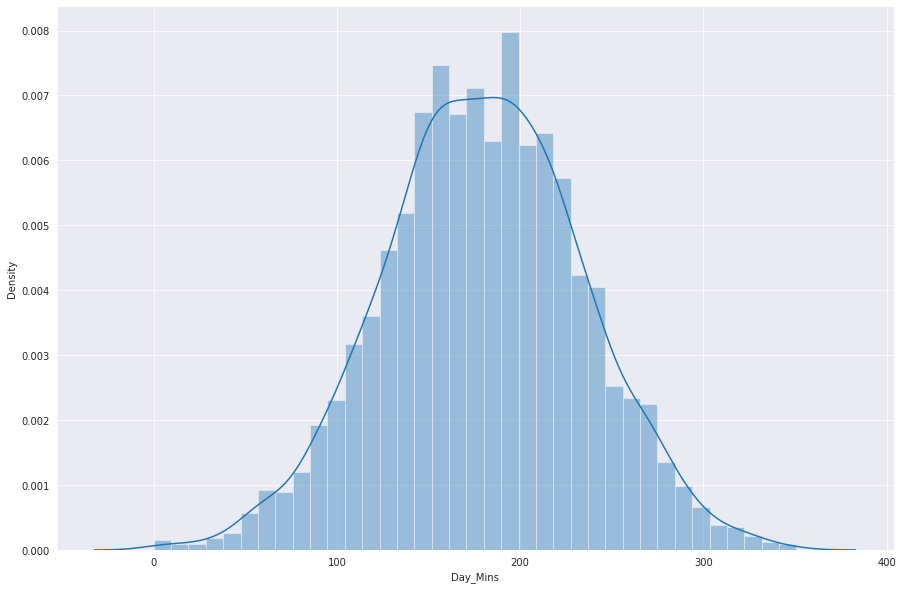

In [42]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Visualize the distribution of 'Day_Mins'
plt.figure(figsize=(15,10))
sns.distplot(telco['Day_Mins'])

# Display the plot
plt.show()

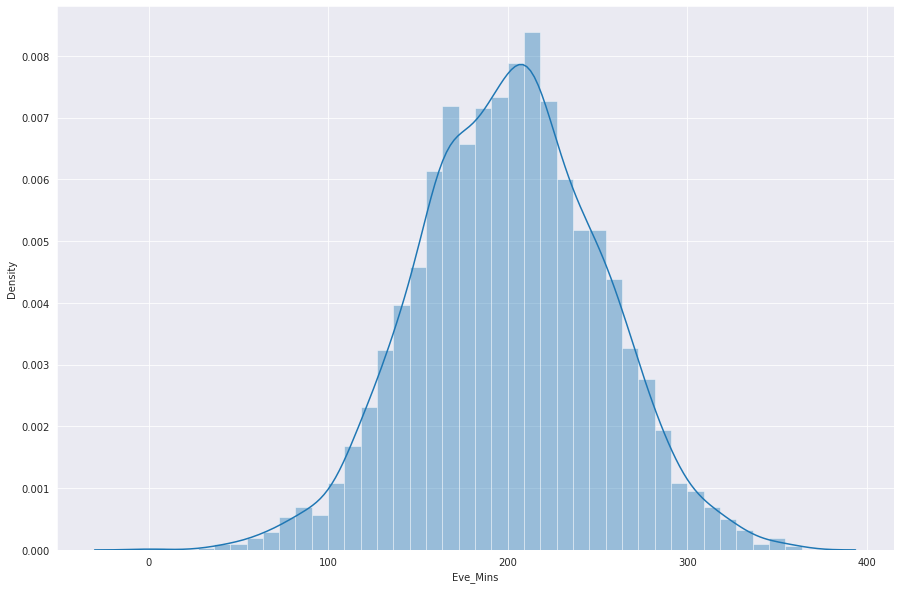

In [43]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Night_Mins'
plt.figure(figsize=(15,10))
sns.distplot(telco['Eve_Mins'])

# Display the plot
plt.show()

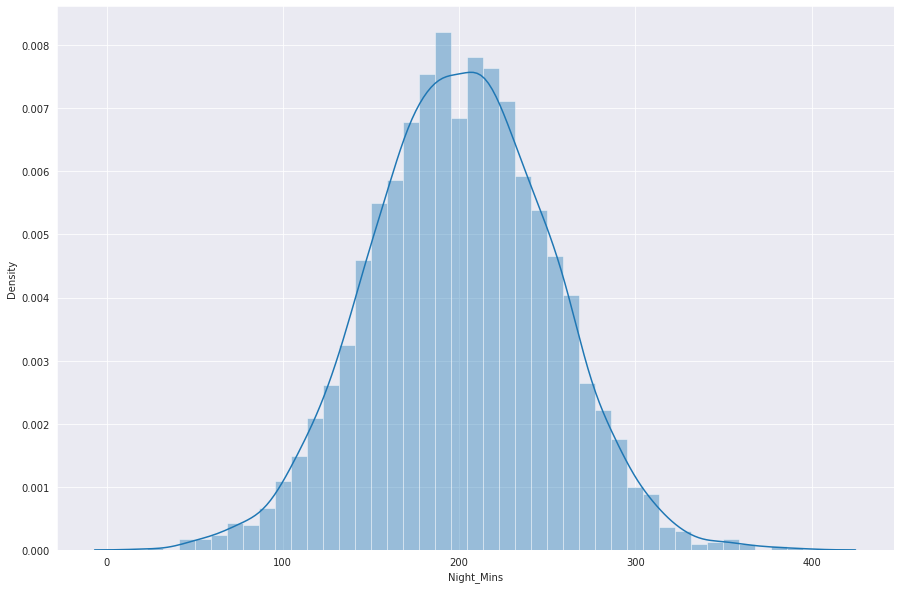

In [44]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Intl_Mins'
plt.figure(figsize=(15,10))
sns.distplot(telco['Night_Mins'])

# Display the plot
plt.show()

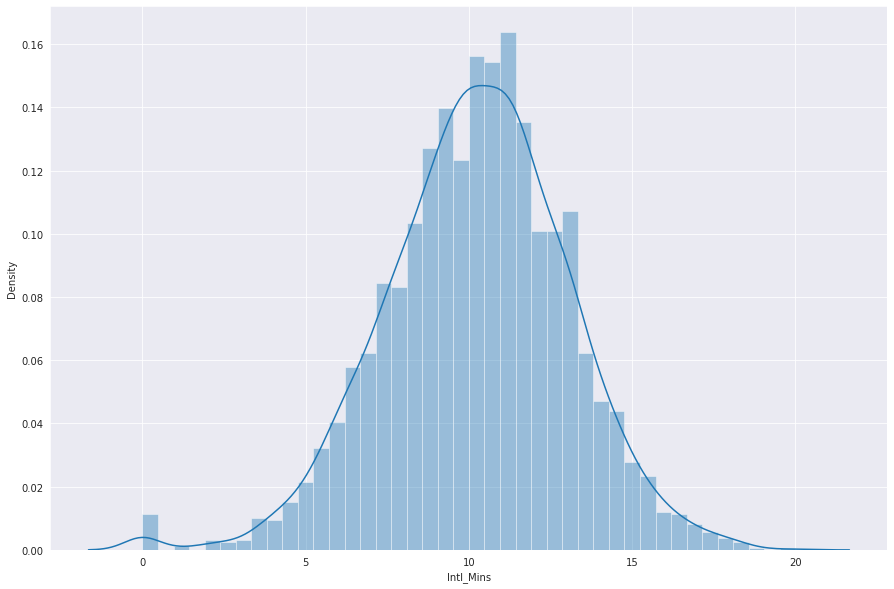

In [45]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Intl_Mins'
plt.figure(figsize=(15,10))
sns.distplot(telco['Intl_Mins'])

# Display the plot
plt.show()

***Bien fait! Toutes ces caractéristiques semblent être bien approximées par la distribution normale. Si ce n'était pas le cas, nous devrions envisager d'appliquer une transformation de fonctionnalité quelconque.***

####**Appels au service client et désabonnement**

+ ***Vous avez déjà vu qu'il n'y a pas beaucoup de différence dans la longueur des comptes entre les churners et les non-churners, mais qu'il y a une différence dans le nombre d'appels au service client laissés par les churners.***

+ **Visualisons maintenant cette différence à l'aide d'une boîte à moustaches et intégrons d'autres caractéristiques intéressantes : les clients qui ont des forfaits internationaux passent-ils plus d'appels au service client ? Ou ont-ils tendance à tourner plus ? Que diriez-vous des plans de messagerie vocale? Découvrons-le!**

+ Rappelez-vous la syntaxe pour créer une boîte à moustaches à l'aide de seaborn :

          sns.boxplot(x = "X-axis variable",
                      y = "Y-axis variable",
                      data = DataFrame)

+ *Si vous souhaitez supprimer les valeurs aberrantes, vous pouvez spécifier le paramètre supplémentaire sym="", et vous pouvez ajouter une troisième variable à l'aide de hue.*

####**Instructions**
+ Créez une boîte à moustaches avec 'Churn' sur l'axe des $x$ et 'CustServ_Calls' sur l'axe des $y$.

+ Il y a une différence très notable ici entre les churners et les non-churners ! Maintenant, supprimez les valeurs aberrantes de la boîte à moustaches.

+ Ajoutez une troisième variable à ce graphique - "Vmail_Plan" - pour visualiser si le fait d'avoir un forfait de messagerie vocale affecte ou non le nombre d'appels au service client ou le taux de désabonnement.

+ Pas beaucoup de différence là-bas. Mettez à jour votre code afin que la troisième variable soit 'Intl_Plan' à la place.

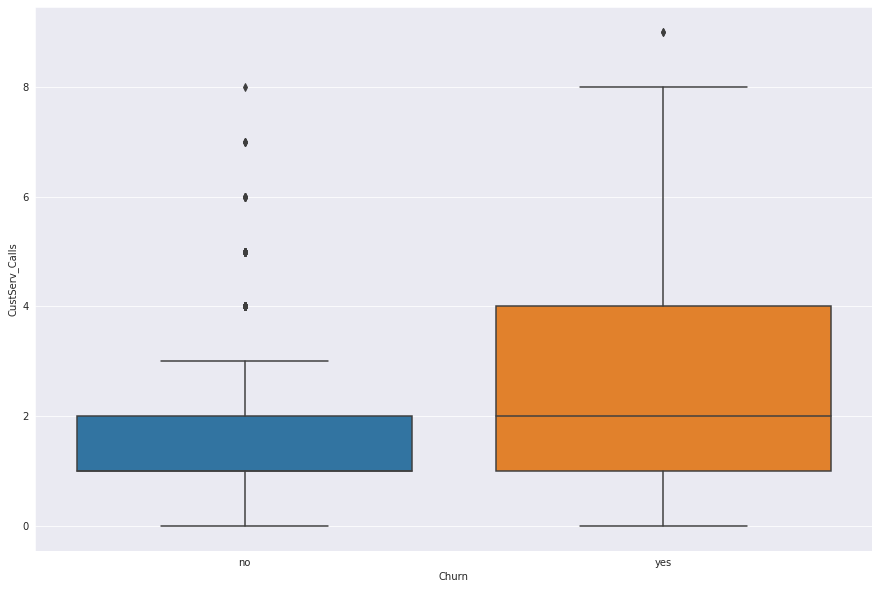

In [46]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)

# Display the plot
plt.show()

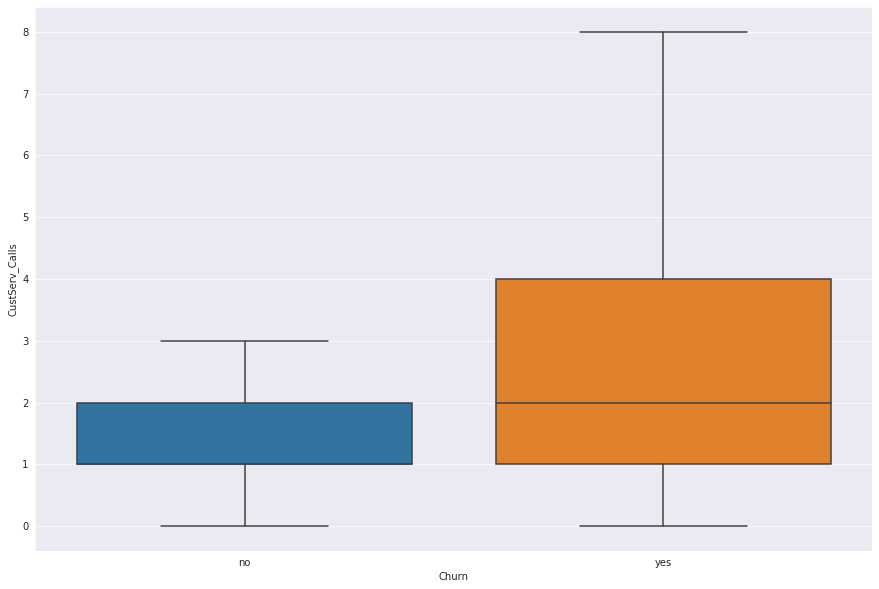

In [47]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = '')

# Display the plot
plt.show()

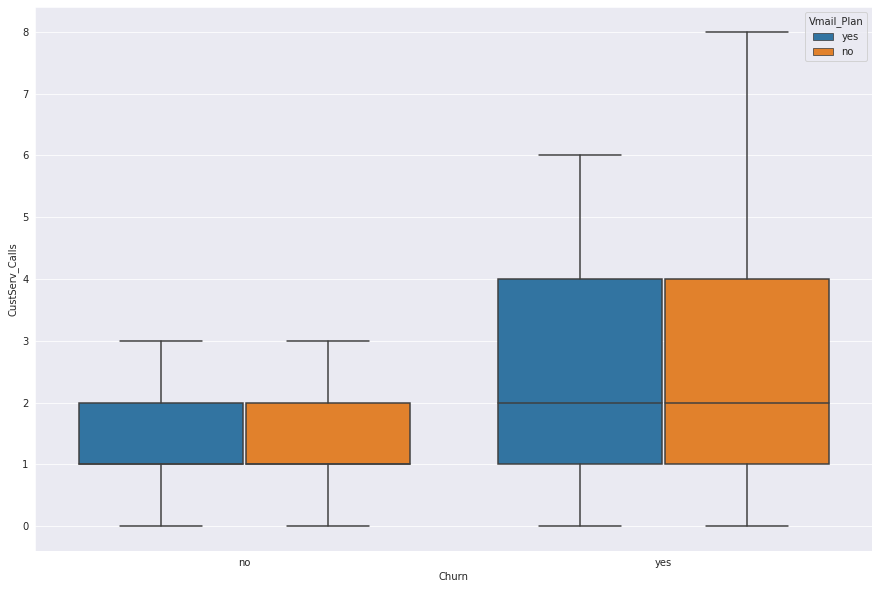

In [48]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Vmail_Plan" as a third variable
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

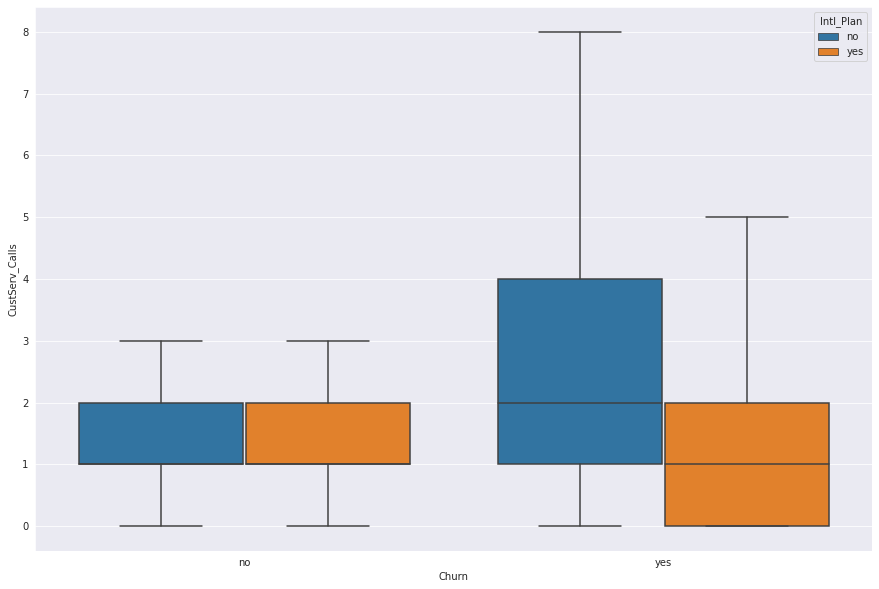

In [49]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Add "Intl_Plan" as a third variable
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

***Excellent travail et félicitations pour avoir terminé le chapitre 1 ! Il y a des idées très intéressantes ici. Il semble que les clients qui se détournent finissent par laisser plus d'appels au service client, à moins que ces clients n'aient également un forfait international, auquel cas ils laissent moins d'appels au service client. Ce type d'informations est vraiment utile pour mieux comprendre les facteurs de désabonnement. Il est maintenant temps d'apprendre à prétraiter vos données avant la modélisation.***

###**Préparation des données**

####**1. Préparation des données**

+ ***Maintenant que vous avez effectué une analyse exploratoire et que vous avez une meilleure compréhension de votre jeu de données, il est temps de le prétraiter en vue de la modélisation.***

####**2. Hypothèses du modèle**

+ ***Rappelez-vous de la leçon précédente que de nombreux modèles d’apprentissage automatique font certaines hypothèses sur la façon dont les données sont distribuées. Si les fonctionnalités de votre jeu de données ne répondent pas à ces hypothèses, les résultats de vos modèles ne seront pas fiables. C’est pourquoi l’étape de prétraitement des données est si critique.***

####**3. Types de données**

+ De nombreux modèles d’apprentissage automatique n’acceptent que les types de données numériques. 
+ Donc, si l’une de vos fonctionnalités est catégorique, elle devra d’abord être encodée numériquement.

####**4. Types de données (Partie 2)**

+ Vous pouvez consulter les types de données dans le DataFrame de l’entreprise de télécommunications à l’aide de son attribut dtype. 

+ Int64 et float64 sont des types de données numériques tels que les appels internationaux et les frais de soirée, tandis que toutes les colonnes qui incluent du texte, tel que State, sont codées en tant qu'« objet ».

####**5. Encodage des fonctionnalités binaires**

+ ***Certaines fonctionnalités qui ont le type de données d’objet, telles que Plan international, ont deux valeurs possibles : « no » et « yes »***. 

####**6. Encodage des fonctionnalités binaires**

+ Pour les représenter numériquement, vous pouvez coder « no » comme 0 et « yes » comme 1, en utilisant soit la méthode remplace, comme illustré ici, soit la fonction LabelEncoder de scikit-learn, comme illustré ici.

####**7. État de codage**

+ La fonction « État » est un peu plus complexe à représenter numériquement, car il y a tellement d’états. Nous pourrions attribuer un numéro à chaque État - 0 pour le Kansas, 1 pour l’Ohio, 2 pour le New Jersey, et ainsi de suite. 

+ Mais attribuer des nombres arbitraires comme celui-ci est dangereux, car cela implique une certaine forme d’ordre dans les États. 

+ Cela aurait du sens pour une fonctionnalité qui avait des catégories telles que « faible », « moyen » ou « élevé », mais dans ce cas, cela n’a pas de sens d’ordonner les états, et cela rendrait votre modèle moins efficace.

####**8. Un encodage à chaud**

+ Au lieu de cela, vous pouvez coder des états à l’aide de ce que l’on appelle un codage à chaud.

####**9. Un encodage à chaud**

+ Cela crée de nouvelles fonctionnalités binaires correspondant à l’état d’origine d’un client donné.

####**10. Un encodage à chaud**
+ Chaque ligne du DataFrame aura un « 1 » dans exactement une colonne d’État et des zéros dans toutes les autres colonnes d’État. 

+ Ce faisant, votre modèle peut utiliser les informations sur l’état d’origine d’un client, sans penser à tort qu’il existe une forme de commande dans la fonctionnalité État.

####**11. Mise à l’échelle des fonctionnalités**

+ Une autre étape importante du prétraitement est la mise à l’échelle des fonctionnalités. 

+ La plupart des modèles exigent que les fonctionnalités soient à la même échelle, mais cela est rarement vrai pour les données du monde réel.

####**12. Mise à l’échelle des fonctionnalités**

+ Dans notre DataFrame télécom, par exemple, la fonction Appels internationaux va de 0 à 20, tandis que la fonction Minutes de nuit va de 23 à 395. 

+ Nous devons donc redimensionner nos données et nous assurer que toutes nos fonctionnalités sont à la même échelle.

####**13. Normalisation**


+ ***Nous le ferons en utilisant un processus connu sous le nom de standardisation, qui centre la distribution autour de la moyenne de vos données et calcule le nombre d’écarts-types par rapport à la moyenne de chaque point. Pour standardiser vos données, vous pouvez utiliser la fonction StandardScaler du prétraitement de points sklearn, comme indiqué dans ces lignes de code, où vous l’instanciez d’abord, puis l’ajustez à vos données.***

####**14. Entraînons-nous!**

+ Dans les exercices, vous aurez la possibilité d’encoder numériquement des caractéristiques catégorielles et de mettre à l’échelle vos données. 
+ Entraînons-nous!

####**Identifier les fonctionnalités à convertir**

+ ***Comme Mark l'a expliqué dans la vidéo, il est préférable d'avoir des fonctionnalités telles que "Churn" encodées en 0 et 1 au lieu de non et oui, afin que vous puissiez ensuite l'intégrer dans des algorithmes d'apprentissage automatique qui n'acceptent que des valeurs numériques.***

+ Outre 'Churn', d'autres caractéristiques de type objet peuvent être converties en 0 et 1. Dans cet exercice, votre travail consiste à explorer les différents types de données de telco dans IPython Shell et à identifier ceux qui sont de type objet.

####**Instructions**

+ Vmail_Plan, Churn, Intl_Plan, Night_Charge.

+ ***Churn, Intl_Plan, Vmail_Plan, State.***

+ Churn, Eve_Charge, Intl_Plan, Vmail_Plan, State.

+ State, Churn, Intl_Plan, Vmail_Plan, CustServ_Calls.

***En effet! Churn, Vmail_Plan et Intl_Plan, en particulier, sont des fonctionnalités binaires qui peuvent facilement être converties en 0 et 1. C'est ce que vous ferez dans le prochain exercice.***

In [50]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

####**Encodage des fonctionnalités binaires**

+ ***La refonte des types de données est une partie importante du prétraitement des données. Dans cet exercice, vous attribuerez respectivement les valeurs 1 à 'yes' et 0 à 'no' aux fonctionnalités 'Vmail_Plan' et 'Churn'.***

+ **Vous avez vu deux approches pour le faire dans la vidéo - l'une utilisant des pandas et l'autre utilisant scikit-learn. Pour des tâches simples comme celle-ci, il est recommandé de s'en tenir aux pandas, c'est donc ce que nous ferons dans cet exercice. Si vous essayez de créer des pipelines d'apprentissage automatique, en revanche - ce qui dépasse le cadre de ce cours - vous pouvez explorer l'utilisation de LabelEncoder().**

+ *Lorsque vous faites de la science des données, il est important d'être conscient qu'il existe toujours plus d'une façon d'accomplir une tâche, et vous devez choisir celle qui est la plus efficace pour votre application.*

####**Instructions**
+ Remplacez 'no' par 0 et 'yes' par 1 dans la colonne 'Vmail_Plan' de telco.
+ Faites de même pour la colonne 'Churn'.

In [51]:
# Assign Label 
telco["Intl_Plan"] = telco["Intl_Plan"].replace({"no": 0,"yes": 1})

telco["Churn"] = telco["Churn"].replace({"no":0, "yes": 1})

telco["Vmail_Plan"] = telco["Vmail_Plan"].replace({"no": 0, "yes": 1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print("======"*15)
print(telco['Churn'].head())
print("======"*15)
print(telco["Intl_Plan"].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64


***Formidable! Avec ces fonctionnalités codées en 0 et 1, vous pouvez désormais les utiliser dans des algorithmes d'apprentissage automatique.***

####**Un encodage à chaud**

+ ***Dans la vidéo, vous avez vu comment la fonctionnalité 'State' peut être encodée numériquement en utilisant la technique d'un encodage à chaud*** :

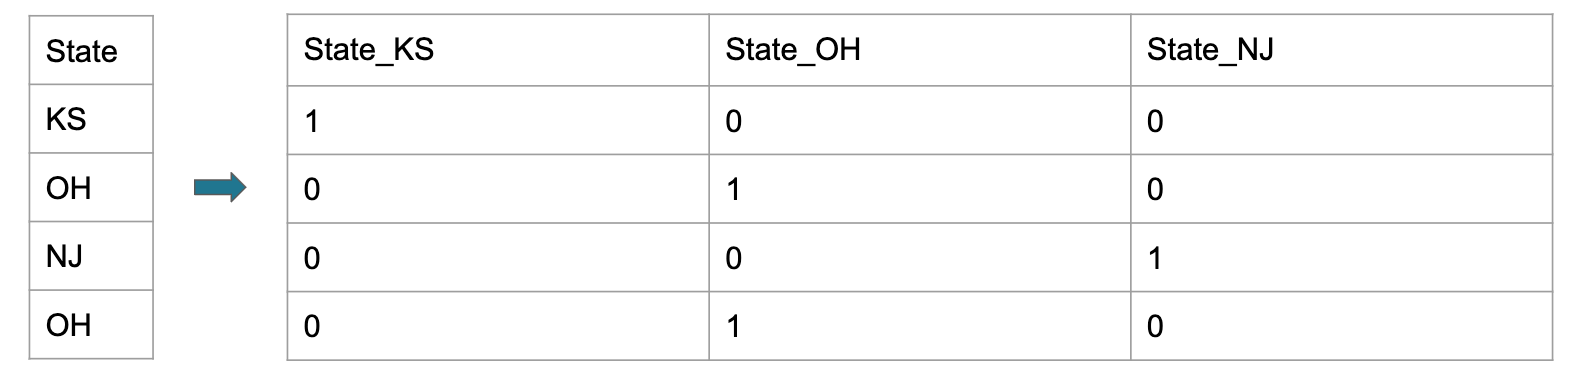

+ *Faire cela manuellement serait assez fastidieux, surtout quand vous avez 50 états et plus de 3000 clients ! Heureusement, pandas a une fonction get_dummies() qui applique automatiquement un encodage à chaud sur la fonctionnalité sélectionnée.*

####**Instructions**
+ Utilisez la fonction pd.get_dummies() pour appliquer un encodage à chaud sur la fonctionnalité 'State' de telco.

+ Imprimez la tête de telco_state.

In [52]:
# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco_state= pd.get_dummies(telco['State'], drop_first = True)

# Print the head of telco_state
print(telco_state.head())

   AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   RI  SC  SD  TN  TX  UT 

***Excellent travail! Notez que cela crée un DataFrame entièrement nouveau. Une fois que vous avez fusionné cela dans le DataFrame telco d'origine, vous pouvez commencer à utiliser ces fonctionnalités d'état dans vos modèles. Notez, cependant, que nous avons maintenant beaucoup plus de fonctionnalités dans notre ensemble de données, nous devrions donc envisager de supprimer celles qui ne sont pas nécessaires.***

####**Mise à l'échelle des fonctionnalités**

+ ***Rappel de la vidéo les différentes échelles des fonctionnalités 'Intl_Calls' et 'Night_Mins'*** :

  + mise à l'échelle des fonctionnalités

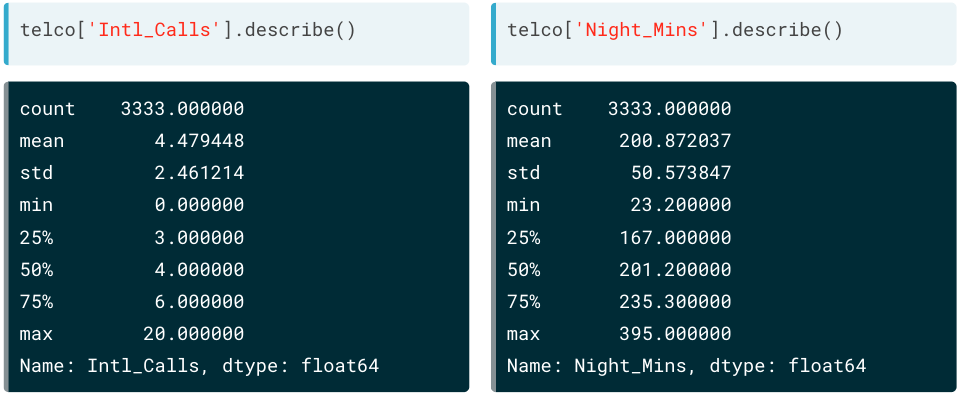


+ Votre travail dans cet exercice consiste à les redimensionner à l'aide de StandardScaler.

+ *Dans votre espace de travail, le Telco DataFrame a été sous-ensemble pour n'inclure que les fonctionnalités que vous souhaitez redimensionner : 'Intl_Calls' et 'Night_Mins'. Pour appliquer StandardScaler, vous devez d'abord l'instancier à l'aide de **StandardScaler()**, puis appliquer la méthode **fit_transform()**, en transmettant le DataFrame que vous souhaitez redimensionner. Vous pouvez le faire en une seule ligne de code* :

      StandardScaler().fit_transform(df)

####**Instructions**

+ Mettez à l'échelle telco en utilisant **StandardScaler()** et **.fit_transform()**.

+ Imprimez les statistiques récapitulatives de telco_scaled_df à l'aide de **.describe()**.



In [53]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco[["Intl_Calls", "Night_Mins"]])

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

display(telco_scaled_df)

,Intl_Calls,Night_Mins
0,-0.601195,0.866743
1,-0.601195,1.058571
2,0.211534,-0.756869
3,1.024263,-0.078551
4,-0.601195,-0.276311
...,...,...
3328,0.617898,1.547039
3329,-0.194831,-0.189297
3330,0.617898,-0.177431
3331,2.243356,-1.219628


In [54]:
# Print summary statistics
print(telco_scaled_df.describe())

         Intl_Calls    Night_Mins
count  3.333000e+03  3.333000e+03
mean  -8.527366e-18  7.887813e-17
std    1.000150e+00  1.000150e+00
min   -1.820289e+00 -3.513648e+00
25%   -6.011951e-01 -6.698545e-01
50%   -1.948306e-01  6.485803e-03
75%    6.178983e-01  6.808485e-01
max    6.307001e+00  3.839081e+00


***Bon travail! Les deux fonctionnalités sont désormais à la même échelle. En pratique, vous devrez soigneusement vous assurer que c'est le cas pour toutes les fonctionnalités qui vous intéressent. Ensuite : sélection des fonctionnalités et ingénierie des fonctionnalités. Rendez-vous dans la prochaine vidéo !***

###**Sélection et ingénierie des fonctionnalités**

####**1. Sélection et ingénierie des fonctionnalités**

+ ***Les ensembles de données ont souvent des caractéristiques qui ne fournissent aucun pouvoir prédictif et doivent être abandonnées avant la modélisation.***

####**2. Suppression des fonctionnalités inutiles**


+ ***Un exemple de fonctionnalités qui peuvent être supprimées sont les identifiants uniques tels que les numéros de téléphone, les numéros de sécurité sociale et les numéros de compte. Les DataFrames Pandas ont une méthode de dépôt que vous pouvez utiliser pour supprimer des colonnes, comme illustré ici.***

####**3. Suppression des fonctionnalités corrélées**
+ Les fonctionnalités fortement corrélées avec d’autres fonctionnalités peuvent également être supprimées, car elles ne fournissent aucune information supplémentaire au modèle.

####**4. Corrélation des caractéristiques (partie 1)**
+ La méthode corr vous permet d’explorer la corrélation entre les entités de votre jeu de données. Dans notre DataFrame télécom, remarquez comment

####**5. Corrélation des caractéristiques (partie 2)**
+ minutes de jour,

####**6. Corrélation des caractéristiques (partie 3)**
+ minutes du soir,

####**7. Corrélation des caractéristiques (partie 4)**
+ minutes de nuit,

####**8. Corrélation des caractéristiques (partie 5)**
+ et les procès-verbaux internationaux sont fortement corrélés avec

####**9. Corrélation des caractéristiques (partie 6)**
+ Frais journaliers,

####**10. Corrélation des caractéristiques (partie 7)**
+ Frais de soirée,

####**11. Corrélation des caractéristiques (partie 8)**
+ Frais de nuit,

####*12. Corrélation des caractéristiques (partie 9)**

+ et la charge internationale, respectivement. 

+ Intuitivement, il est logique que ces fonctionnalités soient corrélées et, du point de vue de la modélisation, nous pouvons améliorer les performances de nos modèles en supprimant ces fonctionnalités redondantes. 

+ Ce processus de sélection des entités à utiliser dans votre modèle est connu sous le nom de sélection de fonctionnalités.

####**13. Ingénierie des fonctionnalités**

+ Outre la sélection des fonctionnalités à utiliser, vous devrez souvent créer de nouvelles fonctionnalités pour améliorer les performances du modèle. 

+ C’est ce qu’on appelle l’ingénierie des fonctionnalités. 

+ La consultation des experts métier et techniques peut conduire à des fonctionnalités supplémentaires et devrait être une étape cruciale pour chaque flux de travail de science des données. 

+ Ce n’est pas une exception pour les modèles de désabonnement. Avec la sélection des fonctionnalités, l’ingénierie des fonctionnalités est une étape critique qui peut ajouter beaucoup de valeur à votre modèle final.

####**14. Exemples d’ingénierie des fonctionnalités**


+ Un exemple de nouvelle fonctionnalité que vous pouvez créer est le nombre total de minutes, qui combine les minutes de jour, les minutes du soir, les minutes de nuit et les minutes internationales. 

+ Ou vous pouvez créer une nouvelle fonctionnalité qui est le rapport entre Minutes et Charge. 

+ Il n’y a vraiment pas de limite, et beaucoup d’ingénierie des fonctionnalités se résume à bien comprendre votre domaine et votre ensemble de données. 

+ Vous pouvez créer de nouvelles fonctionnalités en utilisant des techniques de pandas que vous connaissez déjà. 

+ Par exemple, dans ce code ici, nous créons une nouvelle fonctionnalité appelée Day Cost, qui est le rapport entre Day Minutes et Day Charge.

####**15. Entraînons-nous!**
+ Dans les exercices, vous aurez l’occasion de mettre en pratique la sélection et l’ingénierie des fonctionnalités. Jouir!

###**EXERCICE**

####**Supprimer les fonctionnalités inutiles**

+ Certaines fonctionnalités telles que « Area_Code » et « Téléphone » ne sont pas utiles lorsqu'il s'agit de prédire l'attrition des clients, et elles doivent être supprimées avant la modélisation. 

+ Le moyen le plus simple de le faire en Python consiste à utiliser la méthode .drop() de pandas DataFrames, comme vous l'avez vu dans la vidéo, où 'Soc_Sec' et 'Tax_ID' ont été supprimés :

        telco.drop(['Soc_Sec', 'Tax_ID'], axe=1)

+ *Ici, axis=1 indique que vous souhaitez supprimer 'Soc_Sec' et 'Tax_ID' des colonnes.*

####**Instructions**
+ Supprimez 'Area_Code' et 'Phone' de telco.
+ Vérifiez que les fonctionnalités ont été supprimées en imprimant telco.columns.

In [55]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


***Bien fait! Pourquoi n'utilisons-nous pas d'identifiants uniques tels que les numéros de téléphone dans notre modèle d'attrition ? Ils ne fournissent aucun pouvoir prédictif.***

####**Ingénierie d'une nouvelle colonne**

+ ***Tirer parti des connaissances du domaine pour concevoir de nouvelles fonctionnalités est une partie essentielle de la modélisation. Cette citation d'Andrew Ng résume l'importance de l'ingénierie des fonctionnalités***:

  + **Créer des fonctionnalités est difficile, prend du temps et nécessite des connaissances d'expert. "L'apprentissage automatique appliqué" est essentiellement de l'ingénierie des fonctionnalités.**

+ *Dans cet exercice, votre travail consiste à créer une nouvelle fonctionnalité qui contient des informations sur la durée moyenne des appels de nuit effectués par les clients.*

####**Instructions**
+ Créez une nouvelle fonctionnalité - 'Avg_Night_Calls' - qui est le résultat de la division de 'Night_Mins par 'Night_Calls'.
+ Imprimez les cinq premières lignes de cette nouvelle fonctionnalité.

In [56]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'].div(telco['Night_Calls'])

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


***Bien fait! Tirer parti de votre connaissance du domaine est crucial dans la modélisation du désabonnement.***

###**Faire des prédictions**

####**1. Faire des prédictions**

+ ***Bienvenue au chapitre 3! Après avoir terminé l’exploration et le prétraitement de vos données, il est maintenant temps de construire votre classificateur et de faire des prédictions!***

#####**2. Introduction à l’apprentissage automatique (supervisé)**

+ ***Rappelez-vous que notre objectif est de prédire si un client va ou non se désabonner en fonction de diverses fonctionnalités. Ici, puisque nous avons une variable cible clairement définie - « Churn » - nous utiliserons des techniques d’apprentissage automatique supervisées pour faire des prédictions. Nous avons des données historiques qui contiennent des informations sur le fait qu’un client donné a ou non churn. L’objectif de nos modèles est d’apprendre de ces données afin que nous puissions prédire si les nouveaux clients vont ou non se désabonner. Ces données historiques sont connues sous le nom de données d’entraînement.***


####**3. Apprentissage automatique (supervisé) en Python**
+ Il existe de nombreuses façons d’effectuer un apprentissage supervisé en Python. 

+ Dans ce cours, nous utiliserons scikit-learn, ou sklearn, l’une des bibliothèques d’apprentissage automatique les plus populaires. C’est parti !

####**4. Sélection du modèle**


+ Tout d’abord, nous devons décider quel modèle nous voulons utiliser. 

+ C’est souvent l’une des questions les plus difficiles auxquelles sont confrontés les scientifiques des données, et la réponse est souvent que cela dépend. 

+ Dans ce cours, vous expérimenterez avec quelques modèles différents pour prédire l’attrition des clients. 

+ Nous n’explorerons pas les détails de ces modèles, car DataCamp propose des cours supplémentaires qui vous permettront de mieux comprendre comment ils fonctionnent sous le capot.

####**5. Sélection du modèle**
+ Pour les problèmes de classification, un bon modèle de référence pour commencer est la régression logistique. Il offre simplicité et intelligibilité. 

+ Cependant, il n’est pas assez flexible pour capturer des relations plus complexes dans votre jeu de données. 

+ Les forêts aléatoires sont une bonne prochaine étape 
  - elles ont des performances élevées mais offrent une interprétabilité limitée. 
  
+ Les machines vectorielles de support sont une autre option. 

+ Ils sont généralement performants, mais sont des formateurs inefficaces et ne sont pas très interprétables. 

+ Vous aurez la chance d’essayer tous ces modèles dans les exercices. Dans cette vidéo, essayons un classificateur Support Vector Machine.

####**6. Formation de votre modèle**

+ Le modèle que vous décidez d’utiliser affectera les fonctions que vous importez depuis sklearn. 

+ Pour construire notre classificateur Support Vector Machine, nous devons d’abord importer la classe SVC à partir de sklearn dot svm. 

+ Cette classe SVC implémente l’algorithme de machine à vecteurs de support pour apprendre à partir des données et faire des prédictions. 

+ Nous devons ensuite instancier le classificateur SVC, comme indiqué ici. 

+ Ensuite, nous devons entraîner notre modèle sur nos données de désabonnement. 

+ C’est ce qu’on appelle également l’adaptation de notre modèle aux données. 

+ Dans sklearn, nous utilisons la méthode fit pour ce faire. 

+ Le premier argument qu’il prend en compte est le tableau de fonctionnalités, et le deuxième argument est la variable cible - c’est-à-dire si le client a churné ou non. 

+ Ces deux arguments doivent être des tableaux NumPy ou des DataFrames pandas, et les fonctionnalités doivent être des valeurs continues, telles que le nombre d’appels de service client effectués par un client, par opposition à des catégories, telles que « État ». 

+ Les données avec lesquelles vous allez travailler ont déjà été prétraitées pour remplir ces conditions. 

+ Jetez un coup d’œil à ce qui est renvoyé lorsque vous ajustez le classificateur : c’est le classificateur lui-même, après avoir été modifié pour s’adapter aux données. 

+ Vous aurez l’occasion de jouer avec ces paramètres lors du réglage de vos modèles plus tard dans ce cours.

####**7. Faire une prédiction**

+ Après avoir ajusté votre modèle, vous voudrez peut-être voir la prédiction du modèle pour un nouveau client. 

+ Pour ce faire, nous utilisons la méthode de prédiction, et transmettons les fonctionnalités de notre nouveau client. 

+ En imprimant le résultat, nous voyons 0, ce qui indique que le client n’a pas churné. Bonne nouvelle pour l’entreprise!

####**8. Entraînons-nous!**
+ Très bien, il est maintenant temps pour vous de former votre propre modèle. 
+ Amusez-vous dans les exercices!

###**EXERCICE**
####**Prédire si un nouveau client va se désabonner**

+ ***Comme vous l'avez vu dans la vidéo, pour entraîner un modèle à l'aide de sklearn*** :

  + Importez le modèle qui vous intéresse - ici, un classificateur de vecteur de support (https://scikit-learn.org/stable/modules/svm.html) :
    + from sklearn.svm import SVC

  + Instanciez-le :
    + svc = SVC()

  + Entraînez-le, ou "adaptez-le", aux données :
    + svc.fit(telco['data'], telco['target'])


+ **Ici, le premier argument se compose des caractéristiques, tandis que le deuxième argument est l'étiquette que nous essayons de prédire - si le client va ou non se désabonner. Après avoir ajusté le modèle, vous pouvez utiliser la méthode .predict() du modèle pour prédire l'étiquette d'un nouveau client**.

+ *Ce processus est vrai quel que soit le modèle que vous utilisez, et sklearn en a beaucoup ! Dans cet exercice, vous utiliserez LogisticRegression.*

####**Instructions**

+ À partir de sklearn.linear_model, importez LogisticRegression.
+ Instanciez LogisticRegression(), en stockant le résultat dans clf (abréviation de classificateur).
+ Ajuster clf aux données. Ici, les caractéristiques sont contenues dans la variable de caractéristiques, et la variable cible d'intérêt est 'Churn'.
+ Les caractéristiques d'un nouveau client sont contenues dans la variable new_customer. Utilisez votre classificateur ajusté pour prédire si ce client va ou non désabonner.


In [ ]:
help(pd.DataFrame)

In [57]:
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 
            'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

new_customer = pd.DataFrame([{'Account_Length': 91, 'Vmail_Message': 23, 'Day_Mins': 232.4,  'Eve_Mins': 186.0, 
                            'Night_Mins': 190.5, 'Intl_Mins': 12.3, 'CustServ_Calls': 3, 'Intl_Plan' : 0, 
                             'Vmail_Plan': 1, 'Day_Calls': 97, 'Day_Charge': 39.51, 'Eve_Calls': 88, 'Eve_Charge': 15.81, 
                             'Night_Calls': 128, 'Night_Charge': 8.57,'Intl_Calls': 3,'Intl_Charge': 3.32}])
                            

In [58]:
new_customer

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,91,23,232.4,186.0,190.5,12.3,3,0,1,97,39.51,88,15.81,128,8.57,3,3.32


In [90]:
#bin_cols = telco.nunique()[telco.nunique() == 2].keys().tolist()

In [59]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco.Churn)

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


####**Entraînement d'un autre modèle scikit-learn**

+ ***Tous les modèles sklearn ont des méthodes .fit() et .predict() comme celle que vous avez utilisée dans l'exercice précédent pour le modèle LogisticRegression. Cette fonctionnalité vous permet d'essayer facilement de nombreux modèles différents pour voir lequel vous offre les meilleures performances. Pour vous familiariser avec l'utilisation de l'API sklearn, dans cet exercice, vous allez essayer d'ajuster un DecisionTreeClassifier au lieu d'un LogisticRegression.***

####**Instructions**
+ Importez DecisionTreeClassifier depuis sklearn.tree.
+ Instanciez le classificateur en stockant le résultat dans clf.
+ Entraînez le classifieur aux données. Les caractéristiques sont contenues dans la variable features, et la variable cible d'intérêt est 'Churn'.
+ Prédisez l'étiquette de new_customer.

In [60]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


###**Évaluation de la performance du modèle**

####**1. Évaluation de la performance du modèle**

+ ***Quelle est la qualité de votre modèle? Comment pouvez-vous mesurer sa performance et ensuite l’améliorer? C’est ce que nous allons aborder dans cette vidéo.***

####**2. Exactitude**

+ ***Une façon d’évaluer les performances de votre modèle consiste à calculer sa précision. Disons que sur 100 clients, votre modèle a fait des prédictions correctes sur 90 clients, et des prédictions incorrectes sur 10 clients. Dans ce cas, il serait précis à 90%. Mais quelles données devriez-vous utiliser pour calculer cette précision? Si nous calculions la précision sur les données d’apprentissage, cela ne serait pas indicatif de la façon dont le modèle fonctionnerait sur de nouvelles données, ce qui nous intéresse vraiment! Et nous voulons nous assurer que notre modèle fonctionne bien avant de le déployer réellement, car des millions de dollars peuvent être en jeu!***

####**3. Ensembles de formation et de test**

+ À cette fin, il est courant de diviser vos données en deux ensembles : un ensemble d’entraînement et un ensemble de test. 

+ Vous ajustez votre classificateur à l’ensemble d’apprentissage, puis faites des prédictions à l’aide de l’ensemble de test, ce que le modèle n’a jamais vu auparavant. 

+ C’est une meilleure façon d’évaluer à quel point votre modèle est généralisable.

####**4. Ensembles de formation et de test à l’aide de scikit-learn**


+ Il est temps de diviser l’ensemble de données de télécommunications à l’aide de sklearn ! 

+ Tout d’abord, vous devez importer la fonction train_test_split à partir de la sélection du modèle à points sklearn. 

+ Le premier argument de cette fonction est les données d’entité, et le second est la cible. 

+ Le troisième argument spécifie la proportion des données que vous souhaitez enregistrer à des fins de test. 

+ Dans ce cas, 80% des données seront dans l’ensemble d’entraînement et 20% dans l’ensemble de test, ce qui est un bon point de départ. 

+ L’argument d’état aléatoire vous permet de spécifier un élément de départ. 

+ La définition d’une graine garantit que vos résultats sont reproductibles, car toutes les divisions seront identiques et identiques. 

+ Train test split renvoie quatre tableaux, qui sont décompressés en 4 variables, comme vous pouvez le voir ici. 

+ Ceux-ci représentent, respectivement, les données d’apprentissage, les données de test, les étiquettes d’apprentissage et les étiquettes de test. 

+ Nous instancions ensuite notre classificateur comme auparavant, l’adaptons aux données d’entraînement et faisons nos prédictions sur les données de test.

####**5. Précision informatique**
+ Pour calculer la précision de ce modèle, vous pouvez utiliser la méthode de score de sklearn. 

+ Comme vous pouvez le voir ici, la précision de ce modèle est assez bonne!

####**6. Améliorer votre modèle**

+ Cela soulève la question : 
  + comment pouvez-vous améliorer les performances de votre modèle ? 
  + Vous apprendrez comment le faire dans les leçons suivantes. 
  
+ Si votre modèle correspond trop étroitement aux données d’entraînement, il devient sensible au bruit dans les données d’apprentissage et ne se généralise pas bien aux nouvelles données. 

+ Dans une telle situation, le modèle fonctionne très bien sur les données d’entraînement, mais pas si bien sur les données de test. C’est ce qu’on appelle le surajustement. 

+ D’autre part, si votre modèle est trop simple, il ne capturera pas les tendances de vos données d’entraînement et ne fera pas de bonnes prédictions sur les données d’entraînement ou de test. 

+ C’est ce qu’on appelle le sous-équipement. Afin de construire un bon modèle, il est essentiel de trouver le bon équilibre entre le surajustement et le sous-ajustement.

####**7. Entraînons-nous!**
+ C’est assez de moi. C’est maintenant à votre tour de vous entraîner à fractionner vos données et à calculer la précision sur les données de test!

###**EXERCICE**
####**Création d'ensembles d'entraînement et de test**

+ ***Avant de créer un modèle, il est important de diviser votre ensemble de données en deux : un ensemble d'apprentissage qui sera utilisé pour construire votre modèle d'attrition et un ensemble de test qui sera utilisé pour valider votre modèle. Pour ce faire, vous pouvez utiliser la fonction train_test_split() de sklearn.model_selection.***

+ *Dans cet exercice, vous vous entraînerez à créer des ensembles d'entraînement et de test. Le DataFrame telco est disponible dans votre espace de travail.*

####**Instructions**
+ Importez train_test_split depuis sklearn.model_selection.
+ Créez une variable de fonctionnalité X qui contient toutes les fonctionnalités de telco en supprimant la variable cible "Churn" de telco.
+ Créez une variable cible y qui contient les valeurs de la variable cible - 'Churn'.
+ Divisez votre modèle en ensembles d'entraînement et de test de sorte que 70 % des données soient utilisées pour l'entraînement. Décompressez le résultat dans X_train, X_test, y_train et y_test.

In [61]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

In [62]:
#telco.drop('State', axis=1, inplace=True)
# Dummy Variables
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   3333 non-null   int64  
 1   Vmail_Message    3333 non-null   int64  
 2   Day_Mins         3333 non-null   float64
 3   Eve_Mins         3333 non-null   float64
 4   Night_Mins       3333 non-null   float64
 5   Intl_Mins        3333 non-null   float64
 6   CustServ_Calls   3333 non-null   int64  
 7   Intl_Plan        3333 non-null   int64  
 8   Vmail_Plan       3333 non-null   int64  
 9   Day_Calls        3333 non-null   int64  
 10  Day_Charge       3333 non-null   float64
 11  Eve_Calls        3333 non-null   int64  
 12  Eve_Charge       3333 non-null   float64
 13  Night_Calls      3333 non-null   int64  
 14  Night_Charge     3333 non-null   float64
 15  Intl_Calls       3333 non-null   int64  
 16  Intl_Charge      3333 non-null   float64
 17  Avg_Night_Call

In [63]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

####**Vérifiez la longueur de chaque ensemble**

+ ***Juste pour vous assurer que train_test_split() a fonctionné comme prévu, vérifiez les longueurs de X_train et X_test pour voir combien d'enregistrements se trouvent dans chaque ensemble. Vous pouvez utiliser des fonctions comme len() ou des attributs comme .shape pour explorer cela.***

####**Instructions**
+ 2666 Ensemble de train, 660 Coffret d'essai.

+ 2669 Ensemble de train, 668 Ensemble d'essai.

+ ***2333 Ensemble de train, 1000 Coffret d'essai.***

+ 2662 Ensemble de train, 667 Ensemble d'essai.

In [64]:
(X_train.shape, X_test.shape)

((2333, 69), (1000, 69))

####**Précision de calcul***
+ ***Après avoir divisé vos données en ensembles d'apprentissage et de test, vous pouvez maintenant adapter votre modèle aux données d'apprentissage, puis prédire les étiquettes des données de test. C'est ce que vous allez pratiquer dans cet exercice.***

+ **Jusqu'à présent, vous avez utilisé la régression logistique et les arbres de décision. Ici, vous utiliserez un RandomForestClassifier, que vous pouvez considérer comme un ensemble d'arbres de décision qui surpasse généralement un seul arbre de décision.**

+ *Votre travail dans les exercices précédents s'est poursuivi et les ensembles d'entraînement et de test sont disponibles dans les variables X_train, X_test, y_train et y_test.*

####**Instructions**
+ Importez RandomForestClassifier depuis sklearn.ensemble.
+ Instanciez un RandomForestClassifier en tant que clf.
+ Ajustez clf aux données d'entraînement : X_train et y_train.
+ Calculez la précision de clf sur les données de test à l'aide de la méthode .score().

In [65]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.941


***Excellent travail! On dirait que ce classificateur de forêt aléatoire surpasse le classificateur de vecteur de support.***

###**Mesures du modèle**

####**1. Mesures du modèle**

+ ***Vous avez appris à diviser vos données en ensembles d’apprentissage et de test, à adapter un classificateur et à évaluer ses performances en calculant sa précision. Votre modèle scikit-learn prêt à l’emploi a une grande précision. Votre parcours de modélisation de l’attrition est-il alors terminé ? Malheureusement, pas tout à fait.***

####**2. Classes déséquilibrées**

+ En pratique, de nombreux jeux de données que vous rencontrerez auront tendance à avoir des classes déséquilibrées: 
  + **c’est-à-dire plus de points de données qui appartiennent à une catégorie qu’à une autre**. 
  
+ Dans notre ensemble de données sur l’attrition, par exemple, il y a près de 6 fois plus de non-churners que de churners. 

+ Cela peut avoir un impact sur les performances de votre modèle car il peut apprendre à toujours prédire la classe majoritaire 
  - dans ce cas, que le client ne se désabonnera pas. 
  
+ ***Il existe des techniques telles que le suréchantillonnage et le sous-échantillonnage que vous pouvez utiliser pour équilibrer les classes et résoudre ce problème***. 

+ Consultez les cours d’apprentissage automatique plus avancés de DataCamp pour plus d’informations sur ces techniques. 

+ ***Pour nos besoins, cela signifie que lorsque vous travaillez avec des classes déséquilibrées, la précision n’est pas une mesure très utile***. 

+ Si nous devions construire un classificateur qui prédit TOUJOURS qu’un client ne désagirait pas, il serait très précis - environ 85% précis, dans ce cas - mais il échouerait complètement à identifier les clients qui vont réellement se désabonner. Cela crée le besoin de métriques plus nuancées.

####**3. Matrice de confusion Partie 1**

+ ***Pour mieux comprendre cela, nous pouvons établir un tableau 2 par 2 qui résume les prédictions possibles que notre modèle peut faire**. 

+ **En apprentissage automatique, cette table est appelée matrice de confusion**.

####**4. Matrice de confusion Partie 2**
+ **En haut se trouvent les classes réelles,**

####**5. Matrice de confusion Partie 3**
+ **Et sur le côté se trouvent les classes prédites de notre modèle.**

####**6. Matrice de confusion Partie 4**
+ **Dans la case en haut à gauche, nous avons le nombre de désabonnements correctement classés.**

####**7. Matrice de confusion Partie 5**
+ **Ce sont les vrais points positifs.**

####**8. Matrice de confusion Partie 6**
+ **Dans la case en bas à droite, nous avons le nombre de non-churners qui sont correctement classés.**

####**9. Matrice de confusion Partie 7**
+ **Ce sont les vrais points négatifs. Notez que c’est le cas car nous avons défini notre classe positive pour être les clients qui ont chuté.**

####**10. Matrice de confusion Partie 8**
+ **Dans la case en haut à droite, nous avons le nombre de non-churners classés à tort comme churners.**

####**11. Matrice de confusion Partie 9**
+ **Ce sont les faux positifs, ou les « fausses alarmes ».**

####**12. Matrice de confusion Partie 10**
+ Enfin, dans la case en bas à gauche,

####**13. Matrice de confusion Partie 11**
+ Nous avons le nombre de désabonnements classés à tort comme non-churners. 

+ Ce tableau de prédictions est très puissant, car vous pouvez l’utiliser pour calculer un certain nombre de métriques différentes.

####**14. Matrice de confusion Partie 12**

+ Par exemple, vous pouvez calculer la précision en additionnant les vrais positifs et les vrais négatifs, et en divisant par la somme de tous les éléments de la table. 

+ Plus intéressant encore, il existe quelques autres mesures que vous pouvez également calculer appelées précision et rappel.

####**15. Précision**

+ **La précision est la valeur des vrais positifs divisée par la somme des vrais positifs et des faux positifs.** 

+ **En d’autres termes, il s’agit du nombre de désabonnements correctement classés divisé par le nombre total de clients classés comme churners**. 

+ Si notre modèle avait une grande précision, cela signifierait qu’il n’y avait pas beaucoup de faux positifs - c’est-à-dire pas beaucoup de non-churners qui ont été classés comme churners.

####**16. Rappel**
+ **Le rappel, ou sensibilité, est le Vrai Positif divisé par la somme des Vrais Positifs et des Faux Négatifs**. 

+ **Un rappel élevé dans notre cas signifie que le modèle a correctement classé la plupart des churners.**

####**17. Précision vs rappel**

+ La mesure sur laquelle vous vous concentrez sur l’optimisation dépend souvent de l’analyse de rentabilisation. 

+ Si les offres que vous faites pour conserver les désabonnements potentiels sont élevées par rapport à la valeur de la perte de clients, vous voulez que votre modèle ait une grande précision ou minimise les faux positifs. 

+ Inversement, si vous perdez des clients que vous ne pensiez pas qu’ils se désengageraient est plus coûteux qu’une offre de garder un client qui n’aurait pas baratté que vous voulez un rappel élevé ou minimiser les faux négatifs. 

+ Le rappel et la précision sont beaucoup plus précieux que le simple fait de regarder l’exactitude.

####**18. Matrice de confusion dans scikit-learn**

+ Pour créer une matrice de confusion dans scikit-learn, vous pouvez utiliser la fonction **confusion_matrix de la classe sklearn dot metrics**. 

+ Il prend en compte deux arguments: **les étiquettes réelles et les étiquettes prévues**. 

+ La classe de métriques de Sklearn a des fonctions similaires qui vous permettent de calculer la métrique d’intérêt, qu’il s’agisse de précision ou de rappel.

####**19. Entraînons-nous!**
+ Il est temps maintenant pour vous de vous entraîner à calculer ces métriques vous-même!

###**EXERCICES**

####**Matrice de confusion**

+ ***En utilisant la fonction confusion_matrix() de scikit-learn, vous pouvez facilement créer la matrice de confusion de votre classificateur et acquérir une compréhension plus nuancée de ses performances.***

+ ***Il prend deux arguments : les étiquettes réelles de votre jeu de test - y_test - et vos étiquettes prédites.***

+ **Les étiquettes prédites de votre classificateur Random Forest de l'exercice précédent sont stockées dans y_pred et ont été calculées comme suit**:

      y_pred = clf.predict(X_test)

+ Remarque importante : sklearn, par défaut, calcule la matrice de confusion comme suit :

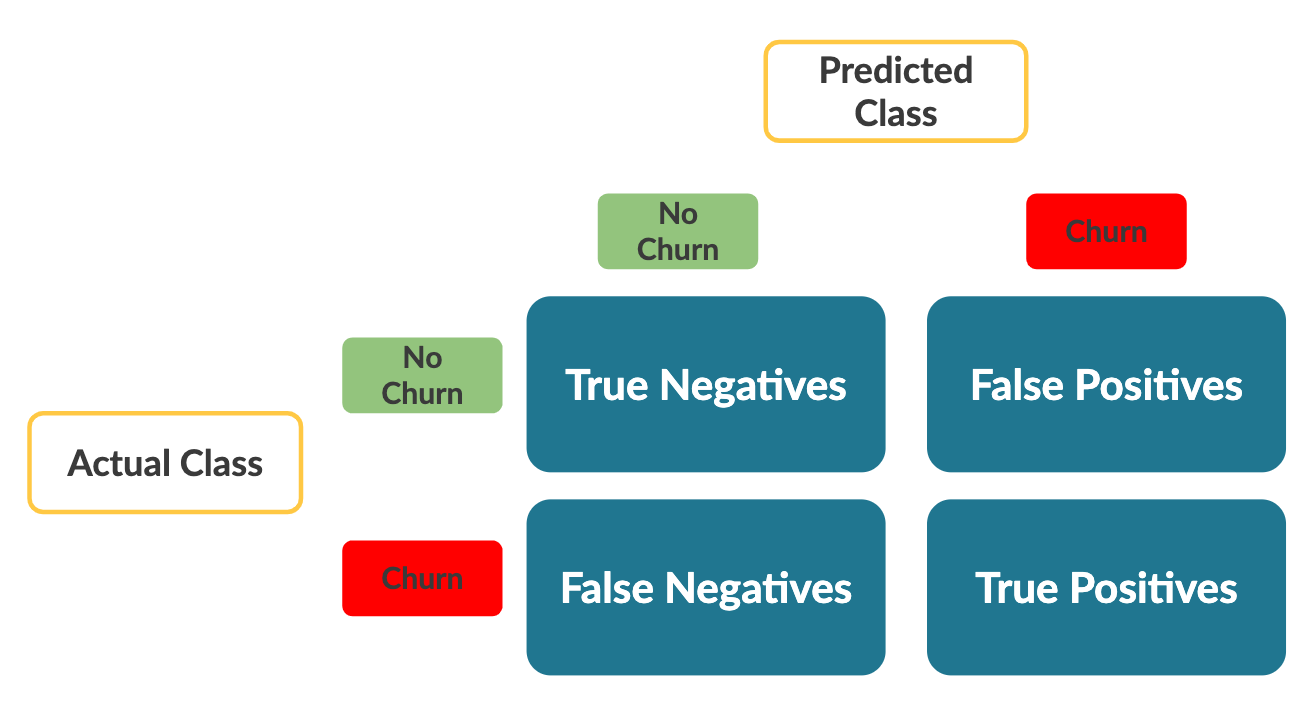

+ *Notez que les axes sont à l'opposé de ce que vous avez vu dans la vidéo. Les mesures elles-mêmes restent les mêmes, mais gardez cela à l'esprit lors de l'interprétation du tableau.*

####**Instructions**
+ Importer confusion_matrix depuis sklearn.metrics

+ Imprimez la matrice de confusion pour votre classificateur en utilisant y_test et y_pred.

####**Question**
+ ***Analysez la matrice de confusion imprimée dans le shell IPython et sélectionnez la déclaration ci-dessous qui n'est pas vraie.***

####**Des réponses possibles**

+ Votre classificateur a fait 934 prédictions correctes.

+ La précision de votre classifieur est de 87,61 %.

+ La sensibilité, ou rappel, de votre classificateur est de 63,44 %.

+ ***Il y a 92 faux négatifs dans les prédictions de votre classificateur.***

+ Il y a 13 faux positifs dans les prédictions de votre classificateur.

In [68]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)


print("======"*10)
display(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).sample(10))
        
print("======"*10)
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

,Actual,Predicted
101,0,0
2939,0,0
389,0,0
2552,0,0
416,1,0
796,0,0
1096,0,0
28,0,0
1037,0,0
1447,0,0


[[851   4]
 [ 56  89]]


####**Taille variable de l'ensemble d'entraînement**

+ ***La taille de vos ensembles d'entraînement et de test influence les performances du modèle. Les modèles apprennent mieux lorsqu'ils disposent de plus de données d'entraînement. Cependant, il y a un risque qu'ils s'adaptent trop aux données de formation et ne se généralisent pas bien aux nouvelles données, donc pour évaluer correctement la capacité du modèle à généraliser, vous avez besoin de suffisamment de données de test. En conséquence, il existe un équilibre et un compromis importants entre la quantité que vous utilisez pour la formation et la quantité que vous détenez pour les tests.***

+ *Jusqu'à présent, vous en avez utilisé 70 % pour la formation et 30 % pour les tests. Utilisons maintenant 80 % des données pour l'entraînement et évaluons comment cela modifie les performances du modèle.*

####**Instructions**
+ Créez des ensembles de formation et de test, avec 80 % des données utilisées pour la formation et 20 % conservées pour les tests.
+ Un RandomForestClassifier a été adapté au nouvel ensemble d'entraînement. 
+ Imprimer sa matrice de confusion.


####**Question**
+ Pour rappel, voici la sortie de la matrice de confusion précédente :

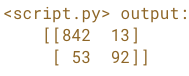

+ **Analysez la nouvelle matrice de confusion et sélectionnez l'énoncé correct parmi les options ci-dessous.***

####**Des réponses possibles**

+ Ce classificateur a fait 628 prédictions correctes, tandis que le classificateur précédent a fait 934 prédictions correctes. En conséquence, le classificateur précédent était meilleur.

+ Ce classificateur a un rappel plus élevé que le classificateur précédent.

+ ***Ce classificateur a une plus grande précision que le classificateur précédent.***

+ Ce classificateur a une précision inférieure à celle du classificateur précédent.

In [70]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[569   2]
 [ 31  65]]


####**Précision de calcul et rappel**

+ ***Le sous-module sklearn.metrics possède de nombreuses fonctions qui vous permettent de calculer facilement des métriques intéressantes. Jusqu'à présent, vous avez calculé la précision et le rappel à la main - c'est important pendant que vous développez votre intuition pour ces deux mesures.***

+ **En pratique, une fois que vous l'avez fait, vous pouvez tirer parti des fonctions precision_score et rappel_score qui calculent automatiquement la précision et le rappel, respectivement. Les deux fonctionnent de la même manière que les autres fonctions de sklearn.metrics - elles acceptent 2 arguments : le premier correspond aux étiquettes réelles (y_test) et le second aux étiquettes prédites (y_pred).**

+ *Essayons maintenant une taille d'entraînement de 90 %.*

####**Instructions**
+ Importez precision_score depuis sklearn.metrics.
+ Affiche la précision du classifieur.
+ Mettez à jour votre code pour calculer le rappel_score au lieu du précision_score.

In [71]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test, y_pred))

0.8888888888888888


In [72]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.64


###**Autres mesures du modèle**

####**1. Autres mesures du modèle**

+ ***Vous avez maintenant ajusté plusieurs classificateurs différents et évalué leurs performances à l’aide de mesures telles que la précision, la sensibilité et la spécificité. Dans cette vidéo, vous allez ajouter une autre technique à votre boîte à outils de modélisation de l’attrition : la courbe des caractéristiques de fonctionnement du récepteur, ou courbe ROC, qui vous permettra de visualiser les performances de votre classificateur de désabonnement.***

####**2. Seuils de probabilité**

+ ***Chaque prédiction que votre classificateur fait sur un nouveau point de données est associée à une probabilité. Par défaut dans scikit-learn, si cette probabilité est supérieure à 50%, votre modèle prédit le point de données comme appartenant à la classe positive, et s’il est inférieur à 50%, il prédit la classe négative. En d’autres termes, le seuil de probabilité par défaut ici est de 50%. Que se passe-t-il si nous faisons varier ce seuil et, pour chaque seuil, comparons le taux de vrais positifs du modèle au taux de faux positifs? Nous obtenons ce qu’on appelle la courbe ROC.***

####**3. Courbe ROC**

+ **Cette courbe permet de diagnostiquer les performances du modèle à différents seuils.**

####**4. Courbe ROC: Partie 2**

+ **L’axe des y est le taux positif réel et varie de 0 à 1**,

####**5. Courbe ROC: Partie 3**
+ **et l’axe des x est le taux de faux positifs qui varie également de 0 à 1**.

####**6. Courbe ROC: Partie 4**

+ **Un classificateur parfait, alors, aurait un taux de vrais positifs de 1 et un taux de faux positifs de 0.**

####**7. Courbe ROC: Partie 5**

+ ***Ces informations peuvent être utilisées pour extraire une autre métrique utile : l’aire sous la courbe ROC, connue sous le nom d’AUC***.

+**Notez qu’un modèle plus performant aura une plus grande surface sous la courbe**.

####**8. Courbe ROC: Partie 6**
+ **La courbe ROC d’un modèle qui devine aléatoirement serait une ligne diagonale,**

####**9. Courbe ROC: Partie 7**
+ et la zone sous cette ligne

####**10. Courbe ROC: Partie 8**
+ serait 0 point 5. Par conséquent, avoir une AUC supérieure à 0 point 5 serait préférable à une estimation aléatoire, tandis qu’une ASC supérieure à 0 point 7 ou 0 point 8 indiquerait un modèle performant.

####**11. Génération de probabilités dans sklearn**

+ **Avec la courbe ROC, l’AUC vous permet d’évaluer et de comparer facilement les performances de différents classificateurs**. 

+ **Pour tracer le ROC, vous devez d’abord calculer les probabilités générées par votre modèle pour chaque point de données**. 

+ Les classificateurs Scikit-learn tels que le classificateur de régression logistique illustré ici ont une méthode proba de prédiction à cet effet. 

+ Chaque colonne contient les probabilités pour les valeurs cibles respectives. 

+ Ainsi, pour le premier point de données, la probabilité que l’étiquette prédite soit « 0 » est d’environ 80%, et la probabilité qu’elle soit « 1 » est de 20%. 

+ Puisque notre classe positive est « 1 », nous sommes intéressés par la deuxième colonne, et nous pouvons la sélectionner comme indiqué ici.

####**12. Courbe ROC dans sklearn**

+ Pour tracer la courbe ROC, importez la courbe roc à partir des métriques sklearn dot. 

+ Cette fonction prend en compte deux arguments : **les étiquettes réelles, suivies des probabilités prédites que nous venons de calculer**. 

+ Décomposez ce résultat en trois variables : 
  + **taux de faux positifs, FPR** ; 
  + **taux positif réel, TPR; et les seuils**. 
  
+ Nous pouvons ensuite tracer le FPR et le TPR en utilisant matplotlib. Le code supplémentaire ici fournit des étiquettes informatives et trace la ligne diagonale que nous pouvons utiliser pour comparer.

####**13. Aire sous la courbe**
+ Pour calculer l’AUC, sklearn dot metrics dispose d’une fonction roc_auc_score que vous pouvez utiliser de la même manière que les autres fonctions de métriques dans scikit-learn.

####**14. Entraînons-nous!**
+ Maintenant, c’est à votre tour d’évaluer les performances de vos classificateurs à l’aide de courbes ROC!

###**EXERCICES**

####**Courbe ROC**

+ ***Créons maintenant une courbe ROC pour notre classificateur de forêt aléatoire. La première étape consiste à calculer les probabilités prédites générées par le classifieur pour chaque étiquette à l'aide de sa méthode .predict_proba(). Ensuite, vous pouvez utiliser la fonction roc_curve de sklearn.metrics pour calculer le taux de faux positifs et le taux de vrais positifs, que vous pouvez ensuite tracer à l'aide de matplotlib.***

+ *Un RandomForestClassifier avec une taille d'ensemble d'entraînement de 70 % a été adapté aux données et est disponible dans votre espace de travail en tant que clf.*

####**Instructions**
+ Calculer les probabilités prédites de clf.
+ Importez roc_curve depuis sklearn.metrics.
+ Utilisez roc_curve() pour calculer le taux de faux positifs, le taux de vrais positifs et les seuils. Décompressez la sortie dans les variables fpr, tpr et thresholds.
+ Utilisez plt.plot() pour tracer le fpr sur l'axe des x et tpr sur l'axe des y.

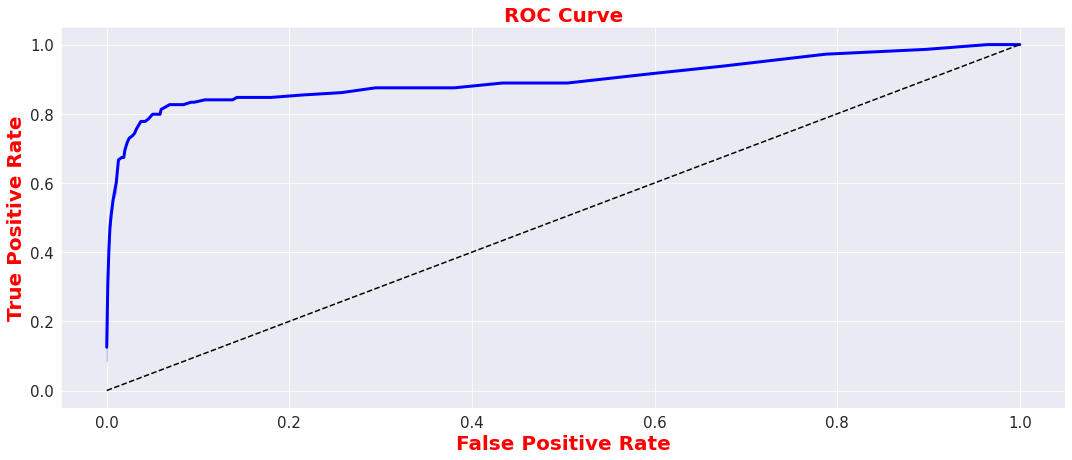

In [73]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict proba of the labels of the test set
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
#plt.plot(fpr, tpr)

# Add labels and diagonal line
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.plot([0, 1], [0, 1], "k--")
#plt.show()


plt.figure(figsize = (18, 7))
plt.title("ROC Curve", color = "red", size = 20, weight = "bold")
sns.lineplot(x = fpr, y = tpr, color = "blue", linewidth = 3)
plt.xlabel("False Positive Rate", color = "red", size = 20, weight = "bold")
plt.ylabel("True Positive Rate", color = "red", size = 20, weight = "bold")
plt.plot([0, 1], [0, 1], "k--")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

####**Aire sous la courbe**

+ ***La courbe ROC de l'exercice précédent est visible sur la droite. Visuellement, cela ressemble à un modèle performant. Quantifions cela en calculant l'aire sous la courbe.***

####**Instructions**

+ Importez roc_auc_score depuis sklearn.metrics.
+ Imprimer la zone sous la courbe ROC.

In [74]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8991149078400831


####**Courbe de rappel de précision**

+ ***Une autre façon d’évaluer les performances du modèle consiste à utiliser une courbe de rappel de précision, qui montre le compromis entre la précision et le rappel pour différents seuils.***

+ *À droite, une courbe de rappel de précision a été générée. Passez un peu de temps à l’étudier, puis sélectionnez la déclaration ci-dessous qui n’est pas vraie.*

####**Instructions**

+ Ces courbes résument le compromis entre le taux positif réel et la valeur prédictive positive.

+ Une zone élevée sous la courbe représente à la fois un rappel élevé et une grande précision.

+ ***Le rappel est synonyme de spécificité, et la précision est identique à la valeur prédictive positive.***

+ Les courbes de rappel de précision ont tendance à être plus informatives lorsque vous avez des classes déséquilibrées.

####**Classement F1**

+ ***Comme vous l'avez découvert, il y a un compromis entre précision et rappel. Les deux sont des mesures importantes, et selon la façon dont l'entreprise essaie de modéliser le taux de désabonnement, vous voudrez peut-être vous concentrer sur l'optimisation de l'un par rapport à l'autre. Souvent, les parties prenantes sont intéressées par une seule métrique qui peut quantifier les performances du modèle. L'AUC est une mesure que vous pouvez utiliser dans ces cas, et une autre est le score F1, qui est calculé comme ci-dessous*** :

$$2 * \frac{(precision * recall)}{(precision + recall)}$$


+ *L'avantage du score F1 est qu'il intègre à la fois la précision et le rappel dans une seule métrique, et un score F1 élevé est le signe d'un modèle performant, même dans des situations où vous pourriez avoir des classes déséquilibrées. Dans scikit-learn, vous pouvez calculer le score f-1 en utilisant la fonction f1_score.*

####**Instructions**
+ Importez f1_score depuis sklearn.metrics.
+ Imprimer le score F1 de la forêt aléatoire formée

In [75]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.6132075471698113


###**Réglage de votre modèle**

####**1. Réglage de votre modèle**

+ ***Bienvenue dans le dernier chapitre! Il est maintenant temps d’apprendre à ajuster votre modèle afin qu’il puisse fonctionner aussi bien que possible avant de commencer à l’utiliser pour prendre des décisions commerciales. Pour ce faire, vous utiliserez une technique de réglage des hyperparamètres connue sous le nom de validation croisée de la recherche de grille. Mais d’abord, que sont les hyperparamètres ?***

####**2. Remise à niveau**


+ Vous souvenez-vous de ce classificateur de machine à vecteurs de support du dernier chapitre? 

+ Remarquez la sortie: 
  + Que signifient des termes comme « C », « degré » et « gamma »? 
  + **Ce sont tous des hyperparamètres qui sont définis AVANT que le modèle ne soit formé, et ces valeurs informent la façon dont le modèle apprend des données**. 
  
+ Chaque algorithme d’apprentissage automatique possède ses propres hyperparamètres spécifiques.

####**3. Hyperparamètres de forêt aléatoire**

+ À titre d’exemple, voici quelques-uns des hyperparamètres d’un modèle de forêt aléatoire. 

+ Pour en savoir plus sur ce que cela signifie, je vous encourage à vous plonger dans la documentation scikit-learn et à consulter le programme d’apprentissage automatique de DataCamp. 

+ Pour nos besoins, ce qui nous intéresse, **c’est de choisir les hyperparamètres optimaux qui mènent au modèle le plus performant**. 

+ Les modèles que vous avez créés jusqu’à présent utilisaient les hyperparamètres par défaut, et vous allez maintenant apprendre à les régler. 

+ **L’un des moyens les plus efficaces de le faire est une technique appelée recherche par grille.**

####**4. Recherche en grille**

+ ***La recherche par grille est une recherche par force brute dans l’espace hyperparamétrique pour trouver la valeur optimale de l’hyperparamètre d’intérêt***. 

+ **Essentiellement, il essaie une plage de différentes valeurs d’hyperparamètres possibles, ajuste les modèles séparément à l’aide de ces différentes valeurs, puis renvoie les hyperparamètres qui conduisent au meilleur ajustement du modèle***. 

+ **Cette plage de valeurs d’hyperparamètres est la « grille » qu’il recherche**. 

+ Si vous spécifiez une grande grille, l’exécution du modèle prendra plus de temps. 

+ La mise en œuvre de la recherche par grille par Scikit-learn utilise une technique appelée validation croisée pour s’assurer que les modèles sont testés sur des données invisibles.

####**5. Recherche de grille dans sklearn**

+ **Pour l’utiliser, importez GridSearchCV à partir de la sélection de modèle à points sklearn**. 

+ **Créez ensuite un dictionnaire appelé param grid, dans lequel les clés sont les noms d’hyperparamètres, tels que $n$ estimateurs, et les valeurs sont des listes contenant les valeurs de l’hyperparamètre que nous souhaitons régler**. 

+ **Ici, nous créons un tableau entre 10 et 50 pour l’hyperparamètre n_estimators** 

+ Vous pouvez également spécifier plusieurs hyperparamètre, bien sûr. 

+ Si vous le faites, toutes les combinaisons possibles seront essayées. 

+ **Après avoir créé la grille d’hyperparamètres, utilisez GridSearchCV pour transmettre votre classificateur instancié et le dictionnaire**. 

+ Cela renvoie un objet que vous pouvez ajuster aux données, comme n’importe quel autre estimateur scikit-learn. 

+ C’est ce qui effectue la recherche de grille. 

+ Ensuite, vous pouvez utiliser le meilleur attribut params pour récupérer l’hyperparamètre qui fonctionne le mieux. 

+ Dans ce cas, il semble que la meilleure valeur pour le paramètre n_estimators était 43. 

+ Vous pouvez également utiliser l’attribut **best_score_** pour voir comment le modèle fonctionne avec cet hyperparamètre.

####**6. Bon accord!**
+ Pour l’instant, il est temps de faire une recherche de grille. Bon accord!


###**Hyperparamètres Randomforest**

|Paramètre| Objectif|
|---------|----------|
|n_estimators| Nombre d'arbres|
|criterion| Qualité de Split|
|max_features| Nombre de fonctionnalités pour la meilleure répartition|
|max_depth| Profondeur maximale de l'arbre|
|min_sample_splits| Échantillons minimum pour diviser le nœud|
|bootstrap| Si les échantillons Bootstrap sont utilisés|

###**EXERCICES**

####**déterminer le nombre de fonctionnalités**

+ ***Les hyperparamètres par défaut utilisés par vos modèles ne sont pas optimisés pour vos données. L'objectif de la validation croisée de la recherche de grille est d'identifier les hyperparamètres qui conduisent à des performances optimales du modèle. Dans la vidéo, vous avez vu comment l'hyperparamètre n_estimators de la forêt aléatoire a été réglé. Ici, vous allez vous entraîner à régler l'hyperparamètre max_features. L'hyperparamètre cv est défini sur 3 afin que le code s'exécute rapidement.***

|hyperparamètre|Objectif|
|--------------|--------|
|max_features| Nombre de fonctionnalités pour la meilleure répartition|


+ **Une forêt aléatoire est un ensemble de plusieurs arbres de décision. L'hyperparamètre n_estimators contrôle le nombre d'arbres à utiliser dans la forêt, tandis que l'hyperparamètre max_features contrôle le nombre d'entités que la forêt aléatoire doit prendre en compte lors de la recherche de la meilleure répartition au niveau de l'arbre de décision.**

+ *Un classificateur de forêt aléatoire a été instancié pour vous en tant que clf.*

####**Instructions**
+ Importez GridSearchCV à partir de sklearn.model_selection.
Spécifiez la grille d'hyperparamètres en créant un dictionnaire avec 'max_features' comme clé et une liste composée de 'auto', 'sqrt', 'log2' comme valeur.
+ Effectuez une validation croisée de la recherche de grille à l'aide de GridSearchCV. Tout d'abord, instanciez l'estimateur, puis ajustez-le aux données.
+ Imprimez la valeur optimale pour 'max_features' en utilisant l'attribut .best_params_ de grid_search.

In [110]:
# Create feature variable
X = telco[['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 
           'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 
           'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']]

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'auto'}


***Bon travail! Il semble que la prise d'un journal du nombre de fonctionnalités conduit à des performances optimales du modèle. Par défaut, le modèle prend la racine carrée du nombre d'entités.***

####**Réglage d'autres hyperparamètres**


+ ***La puissance de GridSearchCV entre vraiment en jeu lorsque vous réglez plusieurs hyperparamètres, car l'algorithme teste alors toutes les combinaisons possibles d'hyperparamètres pour identifier la meilleure combinaison. Ici, vous allez régler les hyperparamètres de forêt aléatoire suivants*** :



|Paramètre| Objectif|
|---------|----------|
|n_estimators| Nombre d'arbres|
|criterion| Qualité de Split|
|max_features| Nombre de fonctionnalités pour la meilleure répartition|
|max_depth| Profondeur maximale de l'arbre|
|min_sample_splits| Échantillons minimum pour diviser le nœud|
|bootstrap| Si les échantillons Bootstrap sont utilisés|

+ *La grille d'hyperparamètres a été spécifiée pour vous, ainsi qu'un classificateur de forêt aléatoire appelé clf.*

####**Instructions**
+ Instanciez l'objet GridSearchCV à l'aide de clf et param_grid.
+ Ajustez grid_search à X et y.

In [111]:
# Create feature variable
X = telco[['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 
           'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 
           'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']]

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X,y)

# Print the best hyperparameters
print(grid_search.best_params_) 

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


####**Question**

+ ***Utilisez l'attribut .best_params_ de grid_search pour identifier la meilleure combinaison de paramètres, cliquez sur "Exécuter le code", puis sélectionnez l'option correcte.***

####**Des réponses possibles**

+ ***{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}***

+ {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10}

+ {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10}

+ {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3}

***En effet! Remarquez comment la recherche de la grille a pris plus de temps cette fois. C'est parce que la grille de recherche était plus grande par rapport à l'exercice précédent.***


####**Recherche aléatoire**

      # Call GridSearchCV
      grid_search = GridSearchCV(clf, param_grid)

      # Fit the model
      grid_search.fit(X, y)

+ Dans le morceau de code ci-dessus de l'exercice précédent, vous avez peut-être remarqué que la première ligne de code ne prenait pas beaucoup de temps à s'exécuter, tandis que l'appel à .fit() prenait plusieurs secondes à s'exécuter.

+ **C'est parce que .fit() est ce qui effectue réellement la recherche de grille, et dans notre cas, c'était une grille avec de nombreuses combinaisons différentes. À mesure que la grille d'hyperparamètres s'agrandit, la recherche de grille devient plus lente. Afin de résoudre ce problème, au lieu d'essayer chaque combinaison de valeurs, nous pourrions sauter au hasard autour de la grille et essayer différentes combinaisons. Il y a une petite possibilité que nous manquions la meilleure combinaison, mais nous gagnerions beaucoup de temps ou pourrions régler plus d'hyperparamètres dans le même laps de temps.**

+ **Dans scikit-learn, vous pouvez le faire en utilisant RandomizedSearchCV(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Il a la même API que GridSearchCV, sauf que vous devez spécifier une distribution de paramètres à partir de laquelle il peut échantillonner au lieu de valeurs d'hyperparamètres spécifiques. Essayons-le maintenant ! La distribution des paramètres a été configurée pour vous, ainsi qu'un classificateur de forêt aléatoire appelé clf.**

####**Instructions**
+ Importez RandomizedSearchCV à partir de sklearn.model_selection.
+ Remarquez comment "max_features" a été spécifié. Appelez RandomizedSearchCV en utilisant clf et param_dist.
+ Effectuez la recherche aléatoire en ajustant les données, puis imprimez les meilleurs paramètres.

In [113]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from random import randint

# Create feature variable
X = telco[['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 
           'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 
           'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']]

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              #"max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

param_dist_1 = {"classifier__max_depth": [3, None],
              "classifier__max_features": randint(1, 11),
              "classifier__min_samples_split": [1, 3, 11],
              "classifier__min_samples_leaf": [1, 3, 11],
               "bootstrap": [True, False],
              "classifier__criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X,y)

# Print best parameters
print(random_search.best_params_)

random_search.get_params().keys()

{'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}


dict_keys(['cv', 'error_score', 'estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

###**Importance des fonctionnalités**


####**1. Importance des fonctionnalités**

+ ***Excellent travail jusqu’à présent! Votre modèle de forêt aléatoire fonctionnait déjà très bien, et vous l’avez ensuite suralimenté en réglant ses hyperparamètres. Maintenant, il est temps de creuser plus loin et d’examiner l’importance des fonctionnalités.***

####**2. Importance des fonctionnalités**
+ ***Les méthodes arborescentes telles que les forêts aléatoires nous permettent de calculer l’importance des caractéristiques, qui sont des scores représentant la contribution de chaque caractéristique à une prédiction. La visualisation de l’importance de ces caractéristiques est un moyen efficace de communiquer les résultats aux parties prenantes. Il peut indiquer quelles fonctionnalités sont importantes dans la conduite de l’attrition et quelles fonctionnalités peuvent être supprimées du modèle.***

####**3. Intellibrillabilité vs exactitude**

+ **Rappelez-vous du chapitre précédent que différents modèles ont des forces et des faiblesses différentes**. 

+ **Par exemple, les techniques d’apprentissage profond ont tendance à très bien fonctionner dans de nombreux domaines différents, mais les réseaux de neurones qui sous-tendent ces techniques sont très difficiles à interpréter**. 

+ **En revanche, des techniques plus simples comme la régression logistique pourraient ne pas fonctionner aussi bien, mais sont plus faciles à interpréter, et cette interprétabilité peut faire la différence entre obtenir ou non l’adhésion des parties prenantes, alors ne sous-estimez pas son importance**. 

+ La valeur d’un modèle de désabonnement n’est pas seulement de vous aider à identifier les clients qui risquent de baratter, mais aussi quels sont les moteurs de l’attrition, alors voyons comment calculer l’importance des fonctionnalités pour notre modèle de forêt aléatoire.

####**4. Importance des caractéristiques de forêt aléatoires**


+ Voici du code qui instancie un classificateur de forêt aléatoire et l’adapte à nos données d’apprentissage. 

+ Après avoir ajusté le modèle, vous pouvez calculer les importances d’entités à l’aide de l’attribut importances d’entités de l’objet de forêt aléatoire, comme illustré ici. Mais le simple fait de regarder les chiffres n’est pas très informatif. 

+ Dans les exercices interactifs, vous apprendrez à visualiser ces importances à l’aide d’un tracé. 

+ Selon vous, quelles caractéristiques seront les plus importantes pour prédire le taux de désabonnement ?

####**5. Entraînons-nous!**
+ Il est temps de le découvrir!

###**EXERCICES**

####**Visualisation de l'importance des fonctionnalités**

+ ***Votre classificateur de forêt aléatoire des exercices précédents a été ajusté aux données telco et est disponible pour vous en tant que clf. Visualisons les importances des fonctionnalités et comprenons quels sont les facteurs de désabonnement, en utilisant le barh de matplotlib pour créer un diagramme à barres horizontales des importances des fonctionnalités.***

####**Instructions**
+ Calculez les importances des caractéristiques de clf.
+ Utilisez plt.barh() pour créer un diagramme à barres horizontales des importances.

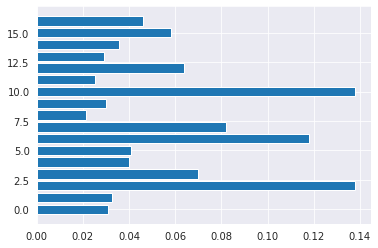

In [114]:
# Create feature variable
X = telco[['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 
           'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 
           'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']]

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(X, y)

# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

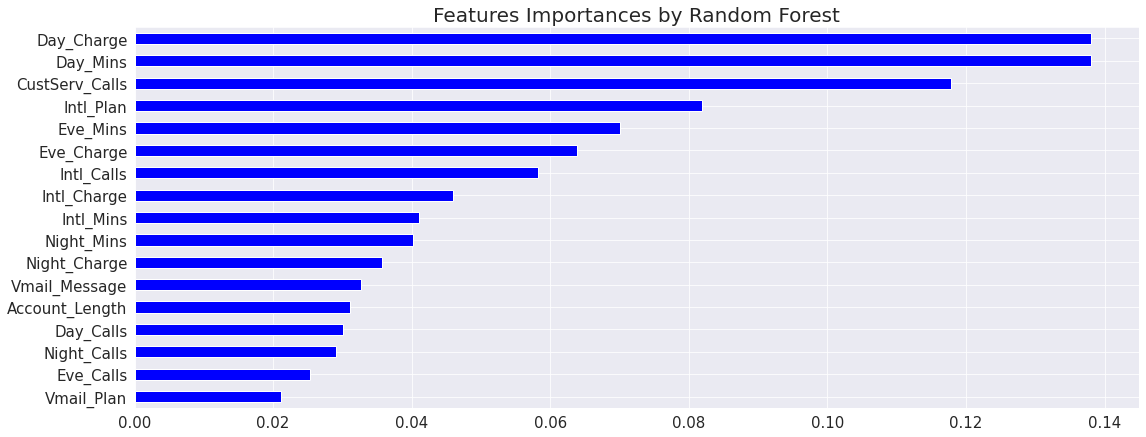

In [116]:
imp = pd.Series(data = clf.feature_importances_, index = X.columns)
imp_sorted = imp.sort_values()
imp_sorted.plot(kind = "barh", color = "blue", figsize = (18, 7))
plt.title("Features Importances by Random Forest", size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

***Bien fait! Mais ce n'est pas plus facile à interpréter... trions les importances et ajoutons des étiquettes pour bien interpréter l'intrigue.***

####**Amélioration de l'intrigue**

+ Afin de rendre l'intrigue plus lisible, nous devons atteindre deux objectifs :

  + Réorganisez les barres par ordre croissant.
  + Ajoutez des étiquettes au tracé qui correspondent aux noms des entités.
  + Pour ce faire, nous allons profiter de l'indexation NumPy. 
  + La méthode .argsort() trie un tableau et renvoie les indices. 
  
+ *Nous utiliserons ces indices pour atteindre ces deux objectifs.*

####**Instructions**

+ Calculez les indices triés des importances en utilisant **np.argsort()** sur les importances.
+ Créez les étiquettes triées en accédant aux colonnes de $X$ et en indexant par **sorted_index**.
+ Créez le graphique en indexant les importances à l'aide de **sorted_index** et en spécifiant l'argument mot-clé **tick_label=labels**.

<Figure size 432x288 with 0 Axes>

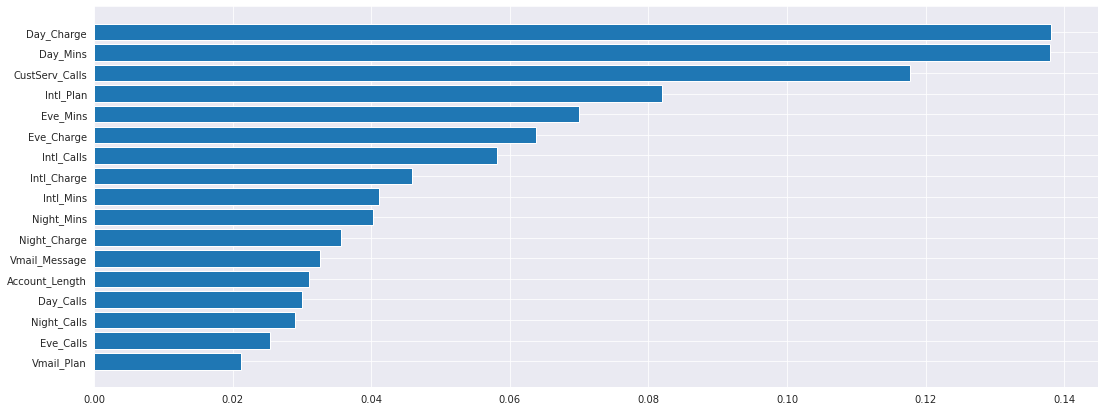

In [118]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.figure(figsize = (18, 7))
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

***Super! Vous avez maintenant une bonne compréhension des fonctionnalités qui sont importantes pour générer du taux de désabonnement.***

####**Interpreting feature importances**

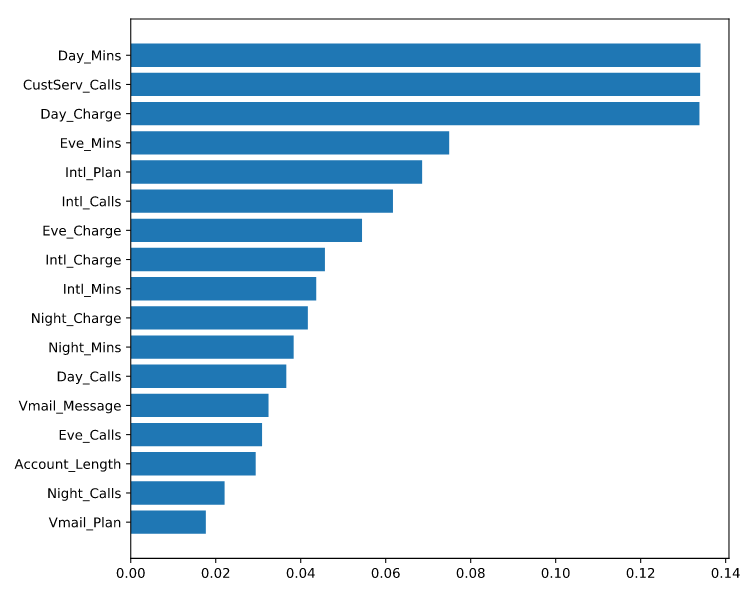

+ *Jetez un œil au diagramme d'importance des caractéristiques que vous venez de créer et sélectionnez l'option appropriée ci-dessous.*

####**Répondre à la question**

+ CustServ_Calls, Day_Mins et Day_Charge ne sont pas importants pour prédire l'attrition.

+ Intl_Charge est plus important que Intl_Calls pour prédire le taux de désabonnement.

+ ***Vmail_Plan est la fonctionnalité la moins importante pour prédire le taux de désabonnement.***

+ Night_Mins et Night_Charge sont tout aussi importants pour prédire l'attrition.

####**Conclusion**

****Corriger! Le graphique nous indique que CustServ_Calls, Day_Mins et Day_Charge sont les facteurs de désabonnement les plus importants. Et si nous ajoutions des sources de données supplémentaires et plus de fonctionnalités ? Explorons cela maintenant.***

###**Ajout de nouvelles fonctionnalités**

####**1. Ajout de nouvelles fonctionnalités**

+ ***L’ajout de fonctionnalités ou de sources de données supplémentaires est un moyen simple d’améliorer les performances du modèle. Même si l’amélioration se traduit par quelques points de pourcentage, cela peut ajouter une grande valeur lors de la résolution d’un problème commercial de plusieurs millions de dollars tel que l’attrition.***

####**2. Sources de données supplémentaires**

+ Les points de contact client sont des sources importantes de données à intégrer dans votre flux de travail de modélisation de l’attrition. 

+ Ces sources fournissent une vue à 360 degrés du client et doivent être incluses dans votre liste de fonctionnalités. 

+ Lorsque vous recherchez des points de contact, imaginer votre expérience personnelle en tant que client de téléphone portable est un grand atout. 

+ Les sources de données que vous pouvez intégrer à votre modèle incluent : 
  + **les notes d’appel du service client, les journaux Web, les campagnes par e-mail, les réseaux sociaux, les transactions et la force du signal de la tour de téléphonie cellulaire.** 
+ L’inclusion de ces sources de données peut considérablement améliorer les performances du modèle.

####**3. Caractéristiques de l’attrition**

+ Dans les exercices à venir, vous ajouterez des fonctionnalités supplémentaires à votre forêt aléatoire précédente et réexécuterez votre modèle de désabonnement. 

+ Vous faites cela pour éviter potentiellement le sous-ajustement en fournissant des informations supplémentaires pour entraîner le modèle. 

+ Les fonctionnalités que vous utiliserez sont les suivantes : code de région, frais totaux, nombre total de minutes, minutes par appel, coût par appel et nombre total d’appels. 

+ Après avoir formé votre forêt aléatoire qui inclut ces fonctionnalités, vous validerez le modèle et le comparerez au modèle que vous avez créé précédemment.

####**4. Amélioration du modèle**

+ En utilisant les connaissances que vous avez acquises, vous allez créer une courbe ROC qui compare les deux modèles et qui inclut l’AUC calculée. 

+ Une fois que vous aurez rendu votre courbe ROC, vous pourrez comparer les deux modèles et déterminer si les gains supplémentaires valent les ressources nécessaires pour les capturer.

####**5. Avantages | Dépens**

+ Travailler avec l’entreprise pour identifier des sources de données supplémentaires fournit une expertise au problème de désabonnement que vous essayez de résoudre. 

+ C’est également le bon moment pour discuter avec eux des avantages et des coûts de l’intégration des fonctionnalités et des sources supplémentaires dans votre modèle. 

+ Les avantages incluent : **un meilleur retour sur investissement, une réduction des coûts et une augmentation des performances**. 

+ Ces avantages sont importants et pourraient potentiellement rapporter des millions à l’entreprise, mais les coûts doivent également être pesés pour s’assurer que les avantages sont plus importants. 

+ L’augmentation de la complexité du modèle, des ressources et du temps d’opérationnalisation sont quelques-uns des coûts à prendre en compte lorsque vous décidez d’ajouter des fonctionnalités et des sources de données supplémentaires.

####**6. Entraînons-nous!**
+ Vous pouvez maintenant réajuster votre modèle et valider les résultats à l’aide de fonctionnalités supplémentaires.

###**EXERCICES**

####**Les performances du modèle s'améliorent-elles ?**
+ 6 nouvelles fonctionnalités ont été ajoutées au DataFrame telco :

  + Region_Code
  + Cost_Call
  + Total_Charge
  + Total_Minutes
  + Total_Calls
  + Min_Call

+ *Cela améliorera-t-il le modèle de désabonnement ? Découvrons-le!*

####**Instructions**
+ Créez des ensembles d'entraînement et de test à l'aide de $X$ et $y$. Conservez 30 % des données pour les tests.
+ Instanciez un RandomForestClassifier en tant que clf et adaptez-le aux données d'apprentissage.
+ Imprimez la précision du classificateur formé à l'aide de .score().

In [121]:
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State',
       'Avg_Night_Calls'],
      dtype='object')

In [125]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X= telco[['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 
    'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 
    'Eve_Charge','Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Total_Minutes', 
    'Total_Charge', 'Min_Call', 'Total_Calls', 'Cost_Call', 'Region_Code']]

# dummy features
X = pd.get_dummies(X)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test, y_test))

####**Calcul d'autres métriques**
+ En plus de la précision, calculons également le score F1 de ce nouveau modèle pour obtenir une meilleure image des performances du modèle.

+ Une répartition 70-30 train-test a déjà été effectuée pour vous et tous les modules nécessaires ont été importés.

####**Instructions**
+ Prédisez les étiquettes de l'ensemble de test.
+ Imprimez le score F1.

In [ ]:
# Import f1_score
from sklearn.metrics import f1_score

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the F1 score
print(f1_score(y_test, y_pred))